## Project Scoping, EDA, cleaning and feature engineering


---

### Problem Statement

One of Singapore's leading property web portals PropertyGuru would like to publish an interactive predictive game on its website for customers to toggle between various factors that might affect home resale prices in Singapore, in a bid to drive website traffic up in the face of competition from other websites like 99co and Stacked Homes. They hope that new property agents will use the report to deepen their understanding of historical market transactions, and people looking to buy their first property in Singapore will also reference the model to inform their decisions on where to purchase their desired property. <br>

PropertyGuru is interested to highlight the top factors that most strongly influence property resale prices and build it into their interactive game. Regression models, which are known for their ease of interpretability, are suitable models for predicting property resale prices in Singapore in a way that is understood easily by the typical consumer. <br>

Success to PropertyGuru would be higher brand awareness, an uptick in website traffic after the guide has been posted, and high download rates of final report.

---

### External Research

Location is a primary consideration when it comes to real estate. The presence and proximity of amenities and lifestyle choices affect property resale prices, and in Singapore the following factors are known to be especially important influencers of property purchase decisions:

- Proximity to quality local schools for young families
- Proximity to workplaces (which explains why property prices have a positive relationship with closeness to the Central Business District)
- Proximity to social, shopping and recreational centres 
- Flat condition
- Lease duration
- Flat size
- Estate maturity

These factors are not truly independent of each other. For example, working professionals with young children will not just want access to good schools but also an easy commute to work, and access to shopping centres, affordable food, or recreational services. 

There is also a growing trend of public housing resale prices exceeding SGD 1M in recent years. 2021 saw a record 259 million-dollar HDB resale flats transactions, a stark increase from 82 in 2020. There were a record number of 111 HDB resale flat transactions that breached the million-dollar mark in the third quarter of 2022. 

More recently, news about Anglo-Chinese School (ACS) relocating ACS (Primary) from Barker Road to Tengah in 2030 triggered much discussion, with analysts predicting that the move will likely push up home prices in Tengah up by 15 per cent. It appears that certain schools may also have a palpable impact on housing prices. 

Sources: [Redbrick SG](https://www.redbrick.sg/blog/what-affects-real-estate-prices/), [ChannelNews Asia](https://www.channelnewsasia.com/singapore/hdb-resale-flat-prices-strong-demand-million-dollar-transactions-property-3030186) and [TODAY](https://www.todayonline.com/singapore/relocation-acs-schools-analysts-expect-downward-pressure-newton-property-prices-opposite-effect-tengah-2104606)

---

## Data Cleaning & EDA


In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import missingno as msno
import haversine as hs
from scipy.special import boxcox1p
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Set max views for columns and rows for ease of EDA

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.set_option('mode.chained_assignment', None)

In [3]:
housing = pd.read_csv('../datasets/train.csv', low_memory=False)
housing.shape

(150634, 78)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [5]:
housing.head()

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  resale_price  \
0     10 TO 12            90.0     Model A                 2006      680000.0   
1     07 TO 09           130.0    Improved                 1987      665000.0   
2     13 TO 15           144.0   Apartment                 1997      838000.0   
3     01 TO 05           103.0     Model A                 1992      550000.0   
4     01 TO 03            83.0  Simplified                 1987      298000.0   

   Tranc_Year  Tranc_Month  mid_storey  lower  upper  mid  \
0        2016            5          11     10     12   11   
1        2012            7           8      7      9    8   
2        2013            7          14     13     15   14   
3        2012            4           3      1      5    3   
4        2017           12           2      1      3    2   

        full_flat_type               address  floor_area_sqft  price_per_sqft  \
0       4 ROOM Model A  3B, UPP BOON KENG RD          968.760      701.928238   
1      5 ROOM Improved     153, BISHAN ST 13         1399.320      475.230826   
2  EXECUTIVE Apartment  289B, BT BATOK ST 25         1550.016      540.639580   
3       4 ROOM Model A     232, BISHAN ST 22         1108.692      496.080066   
4    4 ROOM Simplified     876, YISHUN ST 81          893.412      333.552717   

   hdb_age  max_floor_lvl  year_completed residential commercial  \
0       15             25            2005           Y          N   
1       34              9            1987           Y          N   
2       24             16            1996           Y          N   
3       29             11            1990           Y          Y   
4       34              4            1987           Y          N   

  market_hawker multistorey_carpark precinct_pavilion  total_dwelling_units  \
0             N                   N                 N                   142   
1             N                   N                 N                   112   
2             N                   N                 N                    90   
3             N                   N                 N                    75   
4             N                   N                 N                    48   

   1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  \
0           0           0           0          96          46          0   
1           0           0           0          56          56          0   
2           0           0           0           0          30         60   
3           0           0           0          68           7          0   
4           0           0           0          30          18          0   

   multigen_sold  studio_apartment_sold  1room_rental  2room_rental  \
0              0                      0             0             0   
1              0                      0             0             0   
2              0                      0             0             0   
3              0                      0             0             0   
4              0                      0             0             0   

   3room_rental  other_room_rental  postal  Latitude   Longitude  \
0             0                  0  382003  1.314299  103.872828   
1             0                  0  570153  1.346086  103.855078   
2             0                  0  651289  1.343867  103.760535   
3             0                  0  570232  1.358245  103.845504   
4             0                  0  760876  1.414745  103.835532   

  

In [6]:
housing.drop(columns = ['price_per_sqft'], inplace = True)

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [8]:
# Summary stats

housing.describe(include = 'all')

id Tranc_YearMonth         town flat_type   block  \
count   150634.000000          150634       150634    150634  150634   
unique            NaN             110           26         7    2514   
top               NaN         2018-07  JURONG WEST    4 ROOM       2   
freq              NaN            2088        11451     61136     579   
mean     93047.887496             NaN          NaN       NaN     NaN   
std      53679.906247             NaN          NaN       NaN     NaN   
min          1.000000             NaN          NaN       NaN     NaN   
25%      46469.250000             NaN          NaN       NaN     NaN   
50%      93077.500000             NaN          NaN       NaN     NaN   
75%     139574.750000             NaN          NaN       NaN     NaN   
max     185966.000000             NaN          NaN       NaN     NaN   

           street_name storey_range  floor_area_sqm flat_model  \
count           150634       150634    150634.00000     150634   
unique             553           25             NaN         20   
top     YISHUN RING RD     04 TO 06             NaN    Model A   
freq              2451        34699             NaN      46261   
mean               NaN          NaN        97.19763        NaN   
std                NaN          NaN        24.40304        NaN   
min                NaN          NaN        31.00000        NaN   
25%                NaN          NaN        75.00000        NaN   
50%                NaN          NaN        95.00000        NaN   
75%                NaN          NaN       112.00000        NaN   
max                NaN          NaN       280.00000        NaN   

        lease_commence_date  resale_price     Tranc_Year    Tranc_Month  \
count         150634.000000  1.506340e+05  150634.000000  150634.000000   
unique                  NaN           NaN            NaN            NaN   
top                     NaN           NaN            NaN            NaN   
freq                    NaN           NaN            NaN            NaN   
mean            1992.448464  4.491615e+05    2016.489551       6.580500   
std               12.138829  1.433076e+05       2.752396       3.345468   
min             1966.000000  1.500000e+05    2012.000000       1.000000   
25%             1984.000000  3.470000e+05    2014.000000       4.000000   
50%             1992.000000  4.200000e+05    2017.000000       7.000000   
75%             2001.000000  5.200000e+05    2019.000000       9.000000   
max             2019.000000  1.258000e+06    2021.000000      12.000000   

           mid_storey          lower          upper            mid  \
count   150634.000000  150634.000000  150634.000000  150634.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         8.284823       7.248370       9.321275       8.284823   
std          5.508074       5.515155       5.507364       5.508074   
min          2.000000       1.000000       3.000000       2.000000   
25%          5.000000       4.000000       6.000000       5.000000   
50%          8.000000       7.000000       9.000000       8.000000   
75%         11.000000      10.000000      12.000000      11.000000   
max         50.000000      49.000000      51.000000      50.000000   

        full_flat_type              address  floor_area_sqft        hdb_age  \
count           150634               150634    150634.000000  150634.000000   
unique              43                 9157              NaN            NaN   
top     4 ROOM Model A  91, TANGLIN HALT RD              NaN            NaN   
freq             35127                  106              NaN            NaN   
mean               NaN                  NaN      1046.235290      28.551536   
std                NaN                  NaN       262.674321      12.138829   
min                NaN                  NaN       333.684000      

In [9]:
# Converting id to categorical so it doesn't get mistakenly pre-processed

housing['id'] = housing['id'].astype('object')

### Examining the dependent variable

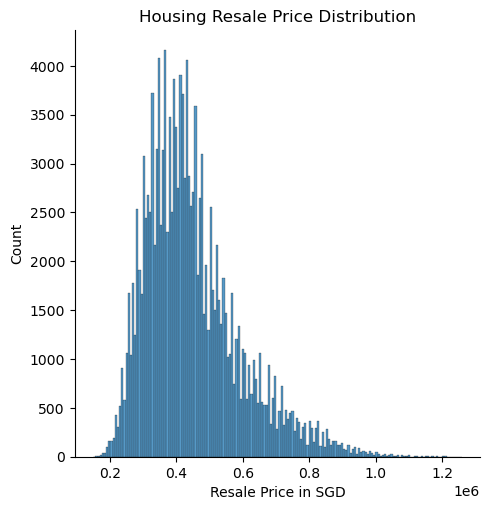

In [10]:
sns.displot(data=housing, x="resale_price")
plt.title("Housing Resale Price Distribution")
plt.xlabel("Resale Price in SGD");

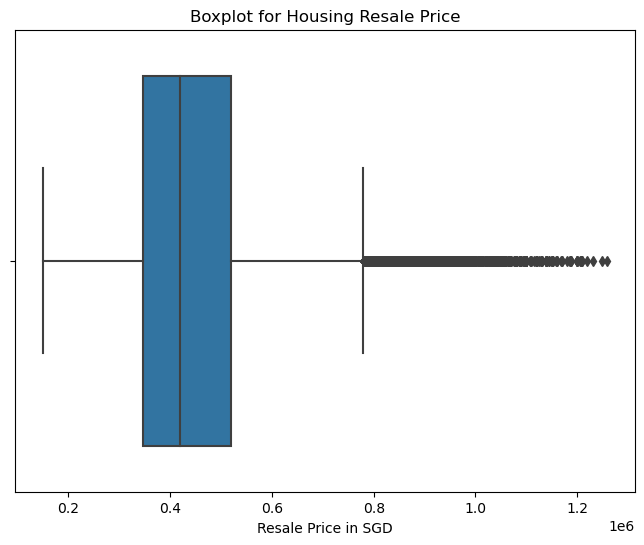

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=housing, x="resale_price")

plt.title("Boxplot for Housing Resale Price")
plt.xlabel("Resale Price in SGD");

Resale price has a right skew that reflects a small number of housing units being sold at a very high price of approximately more than SGD 800,000. 

In [12]:
# Log transforming the dependent variable to reduce the outlier effect 

housing["resale_price_log"] = np.log(housing["resale_price"])

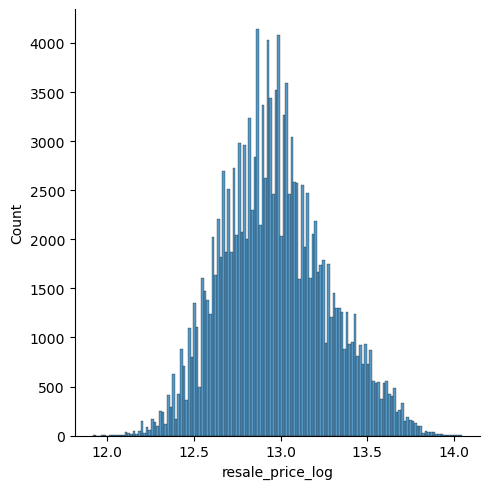

In [13]:
# Looking once again at the distribution of resale price

sns.displot(data=housing, x="resale_price_log")

It resembles a normal curve alot more now, which fulfills an assumption for linear regression.

### Checking for Missing Data and handling them

In [14]:
# Checking for columns with null data.

housing.isna().sum()

id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
resale_price                     0
Tranc_Year                       0
Tranc_Month                      0
mid_storey                       0
lower                            0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
hdb_age                          0
max_floor_lvl                    0
year_completed                   0
residential                      0
commercial                       0
market_hawker                    0
multistorey_carpark              0
precinct_pavilion                0
total_dwelling_units

Missing data is primarily in the variables relating to mall and hawker distances. Visualising the missing data to see how extensive it is:

<AxesSubplot: >

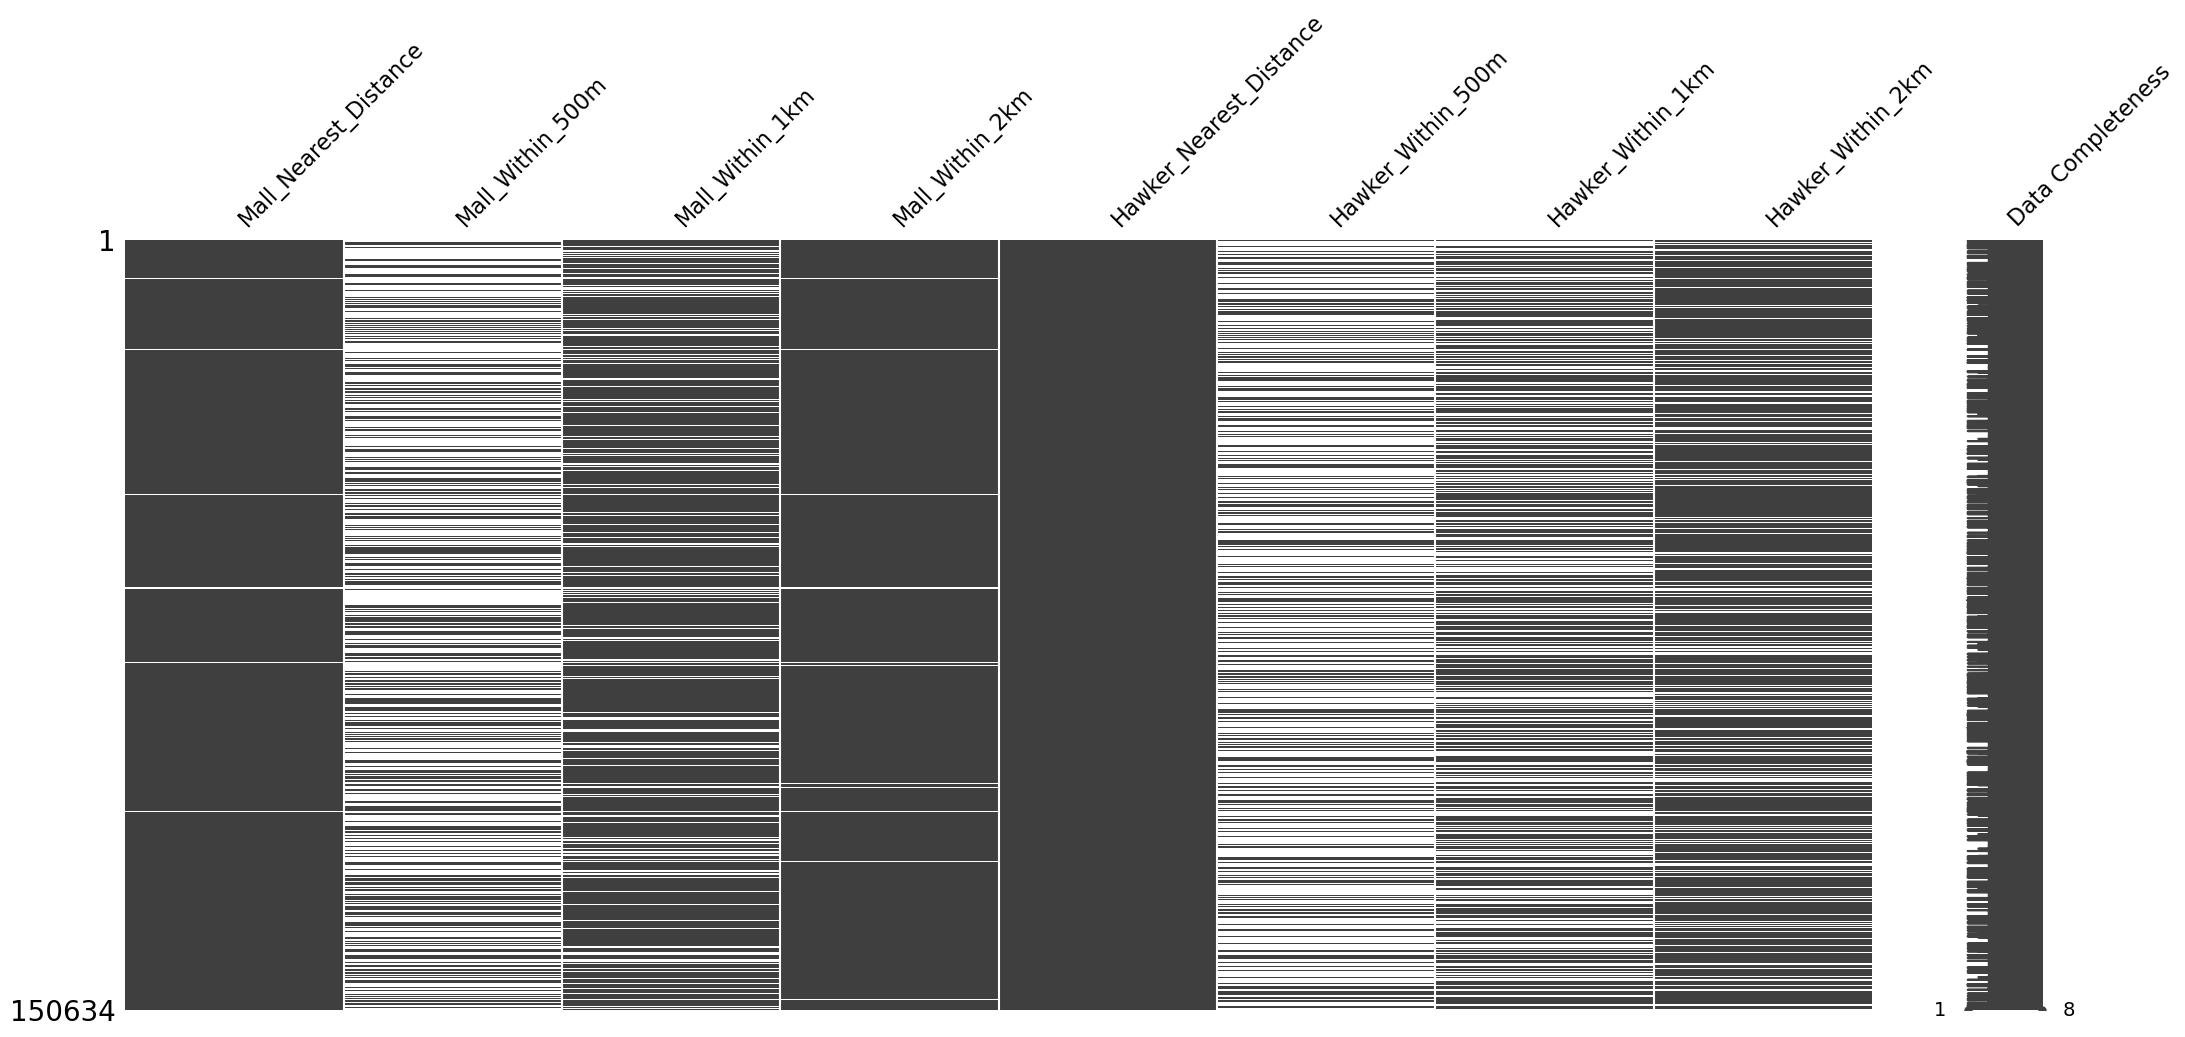

In [15]:
# Visualising missing data in columns with missing data

to_check = housing[['Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km',
       'Mall_Within_2km', 'Hawker_Nearest_Distance', 'Hawker_Within_500m',
       'Hawker_Within_1km', 'Hawker_Within_2km']]

msno.matrix(to_check, labels = True)

There are rows with supposedly blank values for mall nearest distance, but have counts for malls within 500m, 1km etc. We will drop these rows as the missing values are likely to be due to errors during data collection, since there should be data in the nearest distance column but it is blank. We're also unable to ascertain distance to the nearest mall just by looking at the counts of the malls within each radius. The impact on the number of observations is minimal since this issue only affects a few rows.

Are there rows that should contain data but do not?

In [16]:
# Should the missing values under the columns on malls within a certain radius have values?

housing[housing['Mall_Within_500m'].isnull() & (housing['Mall_Nearest_Distance'] <= 500)]


Empty DataFrame
Columns: [id, Tranc_YearMonth, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_commence_date, resale_price, Tranc_Year, Tranc_Month, mid_storey, lower, upper, mid, full_flat_type, address, floor_area_sqft, hdb_age, max_floor_lvl, year_completed, residential, commercial, market_hawker, multistorey_carpark, precinct_pavilion, total_dwelling_units, 1room_sold, 2room_sold, 3room_sold, 4room_sold, 5room_sold, exec_sold, multigen_sold, studio_apartment_sold, 1room_rental, 2room_rental, 3room_rental, other_room_rental, postal, Latitude, Longitude, planning_area, Mall_Nearest_Distance, Mall_Within_500m, Mall_Within_1km, Mall_Within_2km, Hawker_Nearest_Distance, Hawker_Within_500m, Hawker_Within_1km, Hawker_Within_2km, hawker_food_stalls, hawker_market_stalls, mrt_nearest_distance, mrt_name, bus_interchange, mrt_interchange, mrt_latitude, mrt_longitude, bus_stop_nearest_distance, bus_stop_name, bus_stop_latitude, bus_stop_longitude, pri_sch_nearest_distance, pri_sch_name, vacancy, pri_sch_affiliation, pri_sch_latitude, pri_sch_longitude, sec_sch_nearest_dist, sec_sch_name, cutoff_point, affiliation, sec_sch_latitude, sec_sch_longitude, resale_price_log]
Index: []

In [17]:
# Should the missing values under the columns on malls within a certain radius have values?
housing[housing['Mall_Within_1km'].isnull() & (housing['Mall_Nearest_Distance'] <= 1000)]


Empty DataFrame
Columns: [id, Tranc_YearMonth, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_commence_date, resale_price, Tranc_Year, Tranc_Month, mid_storey, lower, upper, mid, full_flat_type, address, floor_area_sqft, hdb_age, max_floor_lvl, year_completed, residential, commercial, market_hawker, multistorey_carpark, precinct_pavilion, total_dwelling_units, 1room_sold, 2room_sold, 3room_sold, 4room_sold, 5room_sold, exec_sold, multigen_sold, studio_apartment_sold, 1room_rental, 2room_rental, 3room_rental, other_room_rental, postal, Latitude, Longitude, planning_area, Mall_Nearest_Distance, Mall_Within_500m, Mall_Within_1km, Mall_Within_2km, Hawker_Nearest_Distance, Hawker_Within_500m, Hawker_Within_1km, Hawker_Within_2km, hawker_food_stalls, hawker_market_stalls, mrt_nearest_distance, mrt_name, bus_interchange, mrt_interchange, mrt_latitude, mrt_longitude, bus_stop_nearest_distance, bus_stop_name, bus_stop_latitude, bus_stop_longitude, pri_sch_nearest_distance, pri_sch_name, vacancy, pri_sch_affiliation, pri_sch_latitude, pri_sch_longitude, sec_sch_nearest_dist, sec_sch_name, cutoff_point, affiliation, sec_sch_latitude, sec_sch_longitude, resale_price_log]
Index: []

In [18]:
# Should the missing values under the columns on malls within a certain radius have values?
housing[housing['Mall_Within_2km'].isnull() & (housing['Mall_Nearest_Distance'] <= 2000)]


Empty DataFrame
Columns: [id, Tranc_YearMonth, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_commence_date, resale_price, Tranc_Year, Tranc_Month, mid_storey, lower, upper, mid, full_flat_type, address, floor_area_sqft, hdb_age, max_floor_lvl, year_completed, residential, commercial, market_hawker, multistorey_carpark, precinct_pavilion, total_dwelling_units, 1room_sold, 2room_sold, 3room_sold, 4room_sold, 5room_sold, exec_sold, multigen_sold, studio_apartment_sold, 1room_rental, 2room_rental, 3room_rental, other_room_rental, postal, Latitude, Longitude, planning_area, Mall_Nearest_Distance, Mall_Within_500m, Mall_Within_1km, Mall_Within_2km, Hawker_Nearest_Distance, Hawker_Within_500m, Hawker_Within_1km, Hawker_Within_2km, hawker_food_stalls, hawker_market_stalls, mrt_nearest_distance, mrt_name, bus_interchange, mrt_interchange, mrt_latitude, mrt_longitude, bus_stop_nearest_distance, bus_stop_name, bus_stop_latitude, bus_stop_longitude, pri_sch_nearest_distance, pri_sch_name, vacancy, pri_sch_affiliation, pri_sch_latitude, pri_sch_longitude, sec_sch_nearest_dist, sec_sch_name, cutoff_point, affiliation, sec_sch_latitude, sec_sch_longitude, resale_price_log]
Index: []

In [19]:
# Should the missing values under the columns on malls within a certain radius have values?
housing[housing['Mall_Within_2km'].isnull() & (housing['Mall_Nearest_Distance'] > 2000)]


id Tranc_YearMonth         town  flat_type block  \
109     156373         2013-01        BEDOK     5 ROOM   601   
220      85651         2014-08        BEDOK     4 ROOM   123   
662     122577         2012-03        BEDOK     5 ROOM   671   
672     146870         2014-12        BEDOK     4 ROOM   602   
798      85682         2019-08        BEDOK     4 ROOM   132   
...        ...             ...          ...        ...   ...   
149097  115311         2016-09        BEDOK     4 ROOM   133   
149446  122570         2020-07        BEDOK     4 ROOM   671   
149450  182757         2018-02        BEDOK  EXECUTIVE   661   
150095   38505         2017-11  JURONG EAST     3 ROOM   330   
150337  115406         2019-01        BEDOK     4 ROOM   120   

               street_name storey_range  floor_area_sqm      flat_model  \
109     BEDOK RESERVOIR RD     07 TO 09           121.0        Improved   
220     BEDOK RESERVOIR RD     10 TO 12            84.0      Simplified   
662              JLN DAMAI     01 TO 05           127.0        Improved   
672     BEDOK RESERVOIR RD     10 TO 12            98.0  New Generation   
798     BEDOK RESERVOIR RD     04 TO 06           103.0         Model A   
...                    ...          ...             ...             ...   
149097  BEDOK RESERVOIR RD     07 TO 09            84.0      Simplified   
149446           JLN DAMAI     07 TO 09           108.0         Model A   
149450           JLN DAMAI     10 TO 12           143.0       Apartment   
150095   JURONG EAST AVE 1     04 TO 06            74.0         Model A   
150337  BEDOK RESERVOIR RD     04 TO 06           104.0  New Generation   

        lease_commence_date  resale_price  Tranc_Year  Tranc_Month  \
109                    1982      510000.0        2013            1   
220                    1987      370000.0        2014            8   
662                    1996      523000.0        2012            3   
672                    1982      398000.0        2014           12   
798                    1987      410000.0        2019            8   
...                     ...           ...         ...          ...   
149097                 1987      355000.0        2016            9   
149446                 1996      488000.0        2020            7   
149450                 1996      730000.0        2018            2   
150095                 1983      305000.0        2017           11   
150337                 1985      385000.0        2019            1   

        mid_storey  lower  upper  mid         full_flat_type  \
109              8      7      9    8        5 ROOM Improved   
220             11     10     12   11      4 ROOM Simplified   
662              3      1      5    3        5 ROOM Improved   
672             11     10     12   11  4 ROOM New Generation   
798              5      4      6    5         4 ROOM Model A   
...            ...    ...    ...  ...                    ...   
149097           8      7      9    8      4 ROOM Simplified   
149446           8      7      9    8         4 ROOM Model A   
149450          11     10     12   11    EXECUTIVE Apartment   
150095           5      4      6    5         3 ROOM Model A   
150337           5      4      6    5  4 ROOM New Generation   

                        address  floor_area_sqft  hdb_age  max_floor_lvl  \
109     601, BEDOK RESERVOIR RD         1302.444       39             12   
220     123, BEDOK RESERVOIR RD          904.176       34             12   
662              671, JLN DAMAI         1367.028       25              9   
672     602, BEDOK RESERVOIR RD         1054.872       39             13   
798     132, BEDOK RESERVOIR RD         1108.692       34             12   
...                         ...              ...      ...            ...   
149097  133, BEDOK RESERVOIR RD          904.176       34             10   
149446           671, JLN DAMAI         1162.512       25              9   
149450           661, JLN DAMAI         1539.252

In [20]:
# Mall Nearest Distance should have some value, regardless of how far away the nearest mall is...

housing[housing['Mall_Nearest_Distance'].isnull()]

id Tranc_YearMonth           town flat_type block  \
75      163384         2021-04       SENGKANG    4 ROOM  468A   
321     163733         2021-03  CHOA CHU KANG    4 ROOM  815C   
478      68334         2021-02        GEYLANG    3 ROOM   18B   
643      68382         2021-02        PUNGGOL    4 ROOM  122A   
691      68193         2020-12       CLEMENTI    3 ROOM  440A   
...        ...             ...            ...       ...   ...   
150296   68302         2021-01        PUNGGOL    3 ROOM  315A   
150388  163799         2021-02        PUNGGOL    5 ROOM  676C   
150394  163287         2021-01        PUNGGOL    4 ROOM  678A   
150479  163674         2021-04        PUNGGOL    4 ROOM  677B   
150625  163670         2021-04        PUNGGOL    5 ROOM  676B   

                street_name storey_range  floor_area_sqm         flat_model  \
75            FERNVALE LINK     19 TO 21            93.0            Model A   
321     CHOA CHU KANG AVE 7     19 TO 21            93.0            Model A   
478              CIRCUIT RD     01 TO 03            67.0            Model A   
643         EDGEDALE PLAINS     10 TO 12            93.0            Model A   
691          CLEMENTI AVE 3     10 TO 12            69.0            Model A   
...                     ...          ...             ...                ...   
150296          PUNGGOL WAY     13 TO 15            68.0  Premium Apartment   
150388           PUNGGOL DR     13 TO 15           113.0  Premium Apartment   
150394           PUNGGOL DR     10 TO 12            93.0  Premium Apartment   
150479           PUNGGOL DR     13 TO 15            93.0  Premium Apartment   
150625           PUNGGOL DR     16 TO 18           113.0  Premium Apartment   

        lease_commence_date  resale_price  Tranc_Year  Tranc_Month  \
75                     2016      455000.0        2021            4   
321                    2017      495000.0        2021            3   
478                    2016      425000.0        2021            2   
643                    2017      455000.0        2021            2   
691                    2018      598000.0        2020           12   
...                     ...           ...         ...          ...   
150296                 2017      388000.0        2021            1   
150388                 2016      690000.0        2021            2   
150394                 2016      518000.0        2021            1   
150479                 2016      515000.0        2021            4   
150625                 2016      715000.0        2021            4   

        mid_storey  lower  upper  mid            full_flat_type  \
75              20     19     21   20            4 ROOM Model A   
321             20     19     21   20            4 ROOM Model A   
478              2      1      3    2            3 ROOM Model A   
643             11     10     12   11            4 ROOM Model A   
691             11     10     12   11            3 ROOM Model A   
...            ...    ...    ...  ...                       ...   
150296          14     13     15   14  3 ROOM Premium Apartment   
150388          14     13     15   14  5 ROOM Premium Apartment   
150394          11     10     12   11  4 ROOM Premium Apartment   
150479          14     13     15   14  4 ROOM Premium Apartment   
150625          17     16     18   17  5 ROOM Premium Apartment   

                          address  floor_area_sqft  hdb_age  max_floor_lvl  \
75            468A, FERNVALE LINK         1001.052        5             26   
321     815C, CHOA CHU KANG AVE 7         1001.052        4             20   
478               18B, CIRCUIT RD          721.188        5             19   
643         122A, EDGEDALE PLAINS         1001.052        4             17   
691          440A, CLEMENTI AVE 3          742.716        3             30   
...                           ...              ...      ...            ...   
150296          315A, PUNGGOL WAY          731.952        4             18   
150388      

It seems that most of the missing values in the mall-within-a-specific-radius fields are because there are actually no malls within that given distance. We'll replace the missing values with 0. For mall_nearest_distance, we will use 2000 as a proxy since the nearest mall is likely more than 2km away. 

In [21]:
housing['Mall_Nearest_Distance'].fillna(2000, inplace = True)

In [22]:
# Imputing missing values with 0

cols = ['Mall_Within_500m', 'Mall_Within_1km', 'Mall_Within_2km', 
        'Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km']

result = [housing[col].fillna(0, inplace = True) for col in cols]

The same checks are conducted for the hawker-related distance variables.

In [23]:
# Looking at the missing values for hawker distances, seems to be similar to mall distances:

housing[housing['Hawker_Within_500m'].isnull()]

Empty DataFrame
Columns: [id, Tranc_YearMonth, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_commence_date, resale_price, Tranc_Year, Tranc_Month, mid_storey, lower, upper, mid, full_flat_type, address, floor_area_sqft, hdb_age, max_floor_lvl, year_completed, residential, commercial, market_hawker, multistorey_carpark, precinct_pavilion, total_dwelling_units, 1room_sold, 2room_sold, 3room_sold, 4room_sold, 5room_sold, exec_sold, multigen_sold, studio_apartment_sold, 1room_rental, 2room_rental, 3room_rental, other_room_rental, postal, Latitude, Longitude, planning_area, Mall_Nearest_Distance, Mall_Within_500m, Mall_Within_1km, Mall_Within_2km, Hawker_Nearest_Distance, Hawker_Within_500m, Hawker_Within_1km, Hawker_Within_2km, hawker_food_stalls, hawker_market_stalls, mrt_nearest_distance, mrt_name, bus_interchange, mrt_interchange, mrt_latitude, mrt_longitude, bus_stop_nearest_distance, bus_stop_name, bus_stop_latitude, bus_stop_longitude, pri_sch_nearest_distance, pri_sch_name, vacancy, pri_sch_affiliation, pri_sch_latitude, pri_sch_longitude, sec_sch_nearest_dist, sec_sch_name, cutoff_point, affiliation, sec_sch_latitude, sec_sch_longitude, resale_price_log]
Index: []

In [24]:
# Should the missing values under the columns on hawker within a certain radius have values?
housing[housing['Hawker_Within_500m'].isnull() & (housing['Hawker_Nearest_Distance'] <= 500)]


Empty DataFrame
Columns: [id, Tranc_YearMonth, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_commence_date, resale_price, Tranc_Year, Tranc_Month, mid_storey, lower, upper, mid, full_flat_type, address, floor_area_sqft, hdb_age, max_floor_lvl, year_completed, residential, commercial, market_hawker, multistorey_carpark, precinct_pavilion, total_dwelling_units, 1room_sold, 2room_sold, 3room_sold, 4room_sold, 5room_sold, exec_sold, multigen_sold, studio_apartment_sold, 1room_rental, 2room_rental, 3room_rental, other_room_rental, postal, Latitude, Longitude, planning_area, Mall_Nearest_Distance, Mall_Within_500m, Mall_Within_1km, Mall_Within_2km, Hawker_Nearest_Distance, Hawker_Within_500m, Hawker_Within_1km, Hawker_Within_2km, hawker_food_stalls, hawker_market_stalls, mrt_nearest_distance, mrt_name, bus_interchange, mrt_interchange, mrt_latitude, mrt_longitude, bus_stop_nearest_distance, bus_stop_name, bus_stop_latitude, bus_stop_longitude, pri_sch_nearest_distance, pri_sch_name, vacancy, pri_sch_affiliation, pri_sch_latitude, pri_sch_longitude, sec_sch_nearest_dist, sec_sch_name, cutoff_point, affiliation, sec_sch_latitude, sec_sch_longitude, resale_price_log]
Index: []

In [25]:
housing[housing['Hawker_Within_1km'].isnull() & (housing['Hawker_Nearest_Distance'] <= 1000)]


Empty DataFrame
Columns: [id, Tranc_YearMonth, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_commence_date, resale_price, Tranc_Year, Tranc_Month, mid_storey, lower, upper, mid, full_flat_type, address, floor_area_sqft, hdb_age, max_floor_lvl, year_completed, residential, commercial, market_hawker, multistorey_carpark, precinct_pavilion, total_dwelling_units, 1room_sold, 2room_sold, 3room_sold, 4room_sold, 5room_sold, exec_sold, multigen_sold, studio_apartment_sold, 1room_rental, 2room_rental, 3room_rental, other_room_rental, postal, Latitude, Longitude, planning_area, Mall_Nearest_Distance, Mall_Within_500m, Mall_Within_1km, Mall_Within_2km, Hawker_Nearest_Distance, Hawker_Within_500m, Hawker_Within_1km, Hawker_Within_2km, hawker_food_stalls, hawker_market_stalls, mrt_nearest_distance, mrt_name, bus_interchange, mrt_interchange, mrt_latitude, mrt_longitude, bus_stop_nearest_distance, bus_stop_name, bus_stop_latitude, bus_stop_longitude, pri_sch_nearest_distance, pri_sch_name, vacancy, pri_sch_affiliation, pri_sch_latitude, pri_sch_longitude, sec_sch_nearest_dist, sec_sch_name, cutoff_point, affiliation, sec_sch_latitude, sec_sch_longitude, resale_price_log]
Index: []

In [26]:
housing[housing['Hawker_Within_2km'].isnull() & (housing['Hawker_Nearest_Distance'] <= 2000)]


Empty DataFrame
Columns: [id, Tranc_YearMonth, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_commence_date, resale_price, Tranc_Year, Tranc_Month, mid_storey, lower, upper, mid, full_flat_type, address, floor_area_sqft, hdb_age, max_floor_lvl, year_completed, residential, commercial, market_hawker, multistorey_carpark, precinct_pavilion, total_dwelling_units, 1room_sold, 2room_sold, 3room_sold, 4room_sold, 5room_sold, exec_sold, multigen_sold, studio_apartment_sold, 1room_rental, 2room_rental, 3room_rental, other_room_rental, postal, Latitude, Longitude, planning_area, Mall_Nearest_Distance, Mall_Within_500m, Mall_Within_1km, Mall_Within_2km, Hawker_Nearest_Distance, Hawker_Within_500m, Hawker_Within_1km, Hawker_Within_2km, hawker_food_stalls, hawker_market_stalls, mrt_nearest_distance, mrt_name, bus_interchange, mrt_interchange, mrt_latitude, mrt_longitude, bus_stop_nearest_distance, bus_stop_name, bus_stop_latitude, bus_stop_longitude, pri_sch_nearest_distance, pri_sch_name, vacancy, pri_sch_affiliation, pri_sch_latitude, pri_sch_longitude, sec_sch_nearest_dist, sec_sch_name, cutoff_point, affiliation, sec_sch_latitude, sec_sch_longitude, resale_price_log]
Index: []

In [27]:
# Same as the mall variables, so we will replace NaN with 0

cols = ['Hawker_Within_500m','Hawker_Within_1km', 'Hawker_Within_2km']

result = [housing[col].fillna(0, inplace = True) for col in cols]

In [28]:
# Double-checking if missing values have been fully handled 

housing.isna().sum()

id                           0
Tranc_YearMonth              0
town                         0
flat_type                    0
block                        0
street_name                  0
storey_range                 0
floor_area_sqm               0
flat_model                   0
lease_commence_date          0
resale_price                 0
Tranc_Year                   0
Tranc_Month                  0
mid_storey                   0
lower                        0
upper                        0
mid                          0
full_flat_type               0
address                      0
floor_area_sqft              0
hdb_age                      0
max_floor_lvl                0
year_completed               0
residential                  0
commercial                   0
market_hawker                0
multistorey_carpark          0
precinct_pavilion            0
total_dwelling_units         0
1room_sold                   0
2room_sold                   0
3room_sold                   0
4room_so

### Cleaning, EDA and feature engineering for numerical variables

In [29]:
# Identifying numerical columns

housing_num = housing.select_dtypes("number")
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 57 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   floor_area_sqm             150634 non-null  float64
 1   lease_commence_date        150634 non-null  int64  
 2   resale_price               150634 non-null  float64
 3   Tranc_Year                 150634 non-null  int64  
 4   Tranc_Month                150634 non-null  int64  
 5   mid_storey                 150634 non-null  int64  
 6   lower                      150634 non-null  int64  
 7   upper                      150634 non-null  int64  
 8   mid                        150634 non-null  int64  
 9   floor_area_sqft            150634 non-null  float64
 10  hdb_age                    150634 non-null  int64  
 11  max_floor_lvl              150634 non-null  int64  
 12  year_completed             150634 non-null  int64  
 13  total_dwelling_units       15

Text(0.5, 1.0, 'Distributions of numerical variables')

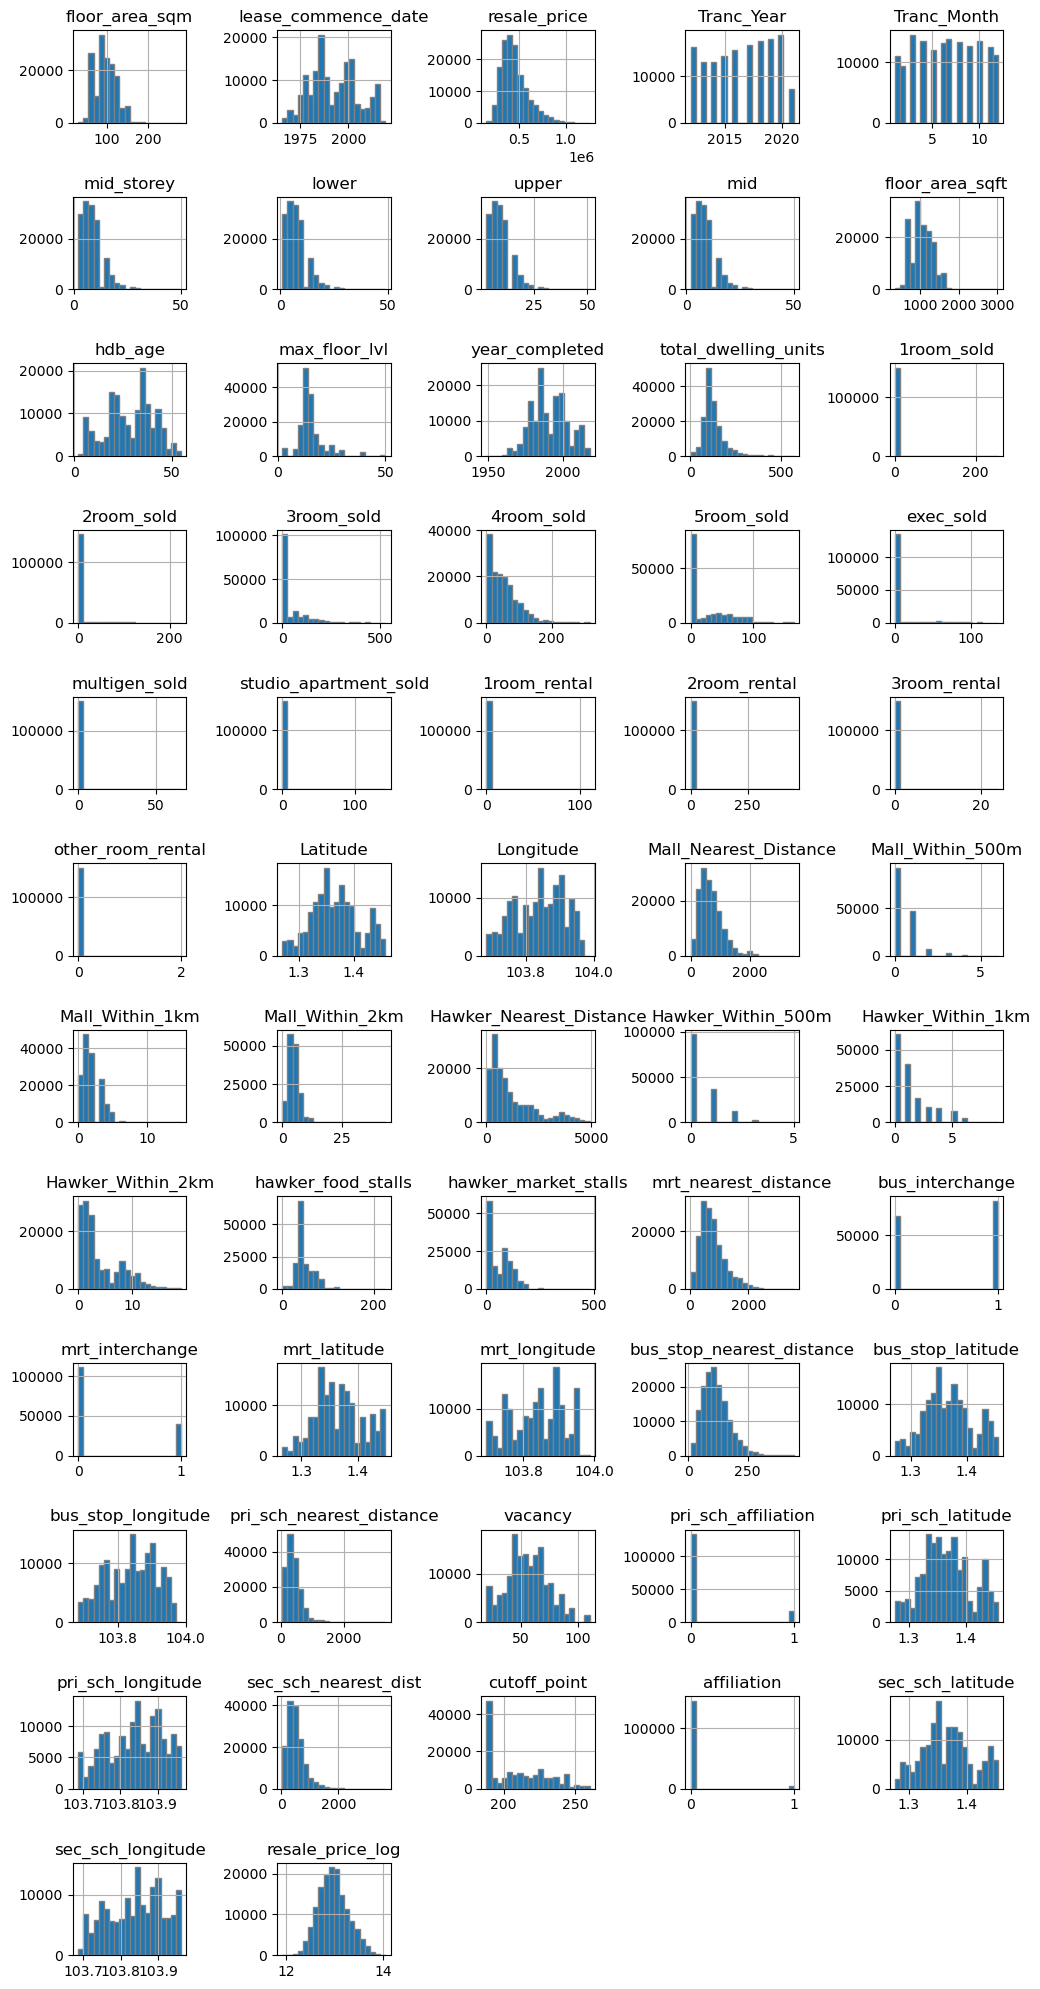

In [30]:
# Taking a quick look at the distribution of all numerical variables

housing_num.hist(bins=20, figsize=(12, 25), edgecolor="gray", layout=(12, 5))
plt.subplots_adjust(hspace=0.8, wspace=0.8)

plt.title("Distributions of numerical variables") 

The histograms show that there are quite a number of variables with sparse distributions, some variables such as affiliation, bus interchange and mrt interchange might be better converted into binary features, and many of the remaining variables are right skewed.

#### 1. Longitude and latitude

Based on external research, the factors affecting property resale price include distance from workplaces, the majority of which are located in the CBD district. We can try getting the approximate straight-line distance between each unit and the CBD. 

In [31]:
# Taking Tanjong Pagar as proxy for CBD

housing['CBD_latitude'] = [1.275619 for x in housing['Latitude']]
housing['CBD_longitude'] = [103.842431 for x in housing['Longitude']]

In [32]:
# Formula for straight line distance based on latitude and longitude

def haversine_np(lon1, lat1, lon2, lat2):
    
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [33]:
# Creating a new column for distance from CBD

housing['distance_from_CBD'] = haversine_np(housing['Latitude'],housing['Longitude'],housing['CBD_latitude'],housing['CBD_longitude'])

We can use the distance variables to account for distance from these amenities from the unit instead of relying on the raw latitude/longitude. We will drop the variables for postal code, latitude and longitude since there are other existing variables that can be substituted instead and have higher interpretability in a regression model. 


In [34]:
# Dropping all latitude, longitude and postal code

housing.drop(columns = ['Latitude', 'Longitude','mrt_latitude', 'mrt_longitude',
                        'bus_stop_latitude','bus_stop_longitude','pri_sch_latitude','pri_sch_longitude',
                        'sec_sch_longitude','sec_sch_latitude','postal','CBD_latitude','CBD_longitude'], inplace = True)

#### 2. Checking for data sparsity

A feature without much variance provides little information to the model, especially if it also has almost no correlation with the target variable.

In [35]:
# Checking variables for potential sparsity by seeing which columns have the high percentage of 0s

print('cols')
col_sparsity = housing[housing == 0].count(axis=0)/len(housing.index)
print(col_sparsity[col_sparsity >0.5])

cols
1room_sold               0.999456
2room_sold               0.958110
3room_sold               0.635122
exec_sold                0.827263
multigen_sold            0.999489
studio_apartment_sold    0.990653
1room_rental             0.997995
2room_rental             0.987626
3room_rental             0.974581
other_room_rental        0.999788
Mall_Within_500m         0.615990
Hawker_Within_500m       0.646534
mrt_interchange          0.735976
pri_sch_affiliation      0.886805
affiliation              0.968121
dtype: float64


In [36]:
# Looking at how the variables correlate with resale price

round(housing[housing.columns[1:]].corr()['resale_price'][:],2)

/var/folders/r9/9246nqp9249ghjl6r9xy_dwr0000gn/T/ipykernel_24032/3809399179.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(housing[housing.columns[1:]].corr()['resale_price'][:],2)


floor_area_sqm               0.65
lease_commence_date          0.35
resale_price                 1.00
Tranc_Year                  -0.02
Tranc_Month                 -0.01
mid_storey                   0.35
lower                        0.35
upper                        0.35
mid                          0.35
floor_area_sqft              0.65
hdb_age                     -0.35
max_floor_lvl                0.50
year_completed               0.35
total_dwelling_units        -0.14
1room_sold                  -0.04
2room_sold                  -0.15
3room_sold                  -0.41
4room_sold                   0.09
5room_sold                   0.36
exec_sold                    0.34
multigen_sold                0.04
studio_apartment_sold        0.04
1room_rental                -0.04
2room_rental                -0.08
3room_rental                -0.08
other_room_rental            0.01
Mall_Nearest_Distance       -0.07
Mall_Within_500m             0.09
Mall_Within_1km              0.08
Mall_Within_2k

In [37]:
# dropping columns due to sparsity of data (more than 50% missing) and low correlation with resale price (< 0.1)

housing.drop(columns = ['Mall_Within_500m', 'Hawker_Within_500m', 'mrt_interchange',
                        'affiliation', 'pri_sch_affiliation', '1room_rental','2room_rental', 
                        '3room_rental', 'other_room_rental'], inplace = True)

#### 3. Examining variables relating to rooms sold

In [38]:
# Checking for correlation 

housing.loc[:,['1room_sold', '2room_sold','3room_sold',
               '4room_sold', '5room_sold', 'exec_sold',
               'multigen_sold','studio_apartment_sold',
               'total_dwelling_units','resale_price']].corr()

1room_sold  2room_sold  3room_sold  4room_sold  \
1room_sold               1.000000   -0.003550   -0.012635   -0.025802   
2room_sold              -0.003550    1.000000    0.052069   -0.122996   
3room_sold              -0.012635    0.052069    1.000000   -0.291417   
4room_sold              -0.025802   -0.122996   -0.291417    1.000000   
5room_sold              -0.018346   -0.117103   -0.400053   -0.051247   
exec_sold               -0.007247   -0.047201   -0.162612   -0.296983   
multigen_sold           -0.000493   -0.003212   -0.010503   -0.021003   
studio_apartment_sold   -0.001957    0.059064    0.007695    0.023716   
total_dwelling_units     0.054922    0.144645    0.677897    0.267377   
resale_price            -0.039434   -0.145287   -0.410368    0.092600   

                       5room_sold  exec_sold  multigen_sold  \
1room_sold              -0.018346  -0.007247      -0.000493   
2room_sold              -0.117103  -0.047201      -0.003212   
3room_sold              -0.400053  -0.162612      -0.010503   
4room_sold              -0.051247  -0.296983      -0.021003   
5room_sold               1.000000  -0.160837      -0.016596   
exec_sold               -0.160837   1.000000      -0.006556   
multigen_sold           -0.016596  -0.006556       1.000000   
studio_apartment_sold   -0.040633  -0.026032      -0.001770   
total_dwelling_units    -0.029916  -0.203180      -0.022014   
resale_price             0.359434   0.337500       0.037406   

                       studio_apartment_sold  total_dwelling_units  \
1room_sold                         -0.001957              0.054922   
2room_sold                          0.059064              0.144645   
3room_sold                          0.007695              0.677897   
4room_sold                          0.023716              0.267377   
5room_sold                         -0.040633             -0.029916   
exec_sold                          -0.026032             -0.203180   
multigen_sold                      -0.001770             -0.022014   
studio_apartment_sold               1.000000              0.097896   
total_dwelling_units                0.097896              1.000000   
resale_price                        0.040312             -0.140725   

                       resale_price  
1room_sold                -0.039434  
2room_sold                -0.145287  
3room_sold                -0.410368  
4room_sold                 0.092600  
5room_sold                 0.359434  
exec_sold                  0.337500  
multigen_sold              0.037406  
studio_apartment_sold      0.040312  
total_dwelling_units      -0.140725  
resale_price               1.000000

Total dwelling units is correlated with the number of 3-rooms sold. Correlation of number of units sold and resale price is not particularly strong.

Text(0.5, 1.0, 'Distributions of features relating to number of rooms sold')

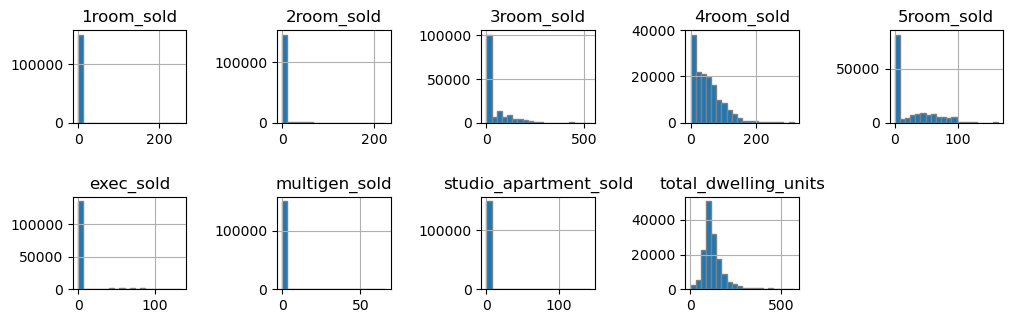

In [39]:
# Examining distributions of variables relating to rooms sold again in detail

housing_num = housing[['1room_sold', '2room_sold','3room_sold',
               '4room_sold', '5room_sold', 'exec_sold',
               'multigen_sold','studio_apartment_sold',
               'total_dwelling_units']]
housing_num.hist(bins=20, figsize=(12, 25), edgecolor="gray", layout=(12, 5))
plt.subplots_adjust(hspace=0.8, wspace=0.8)
plt.title("Distributions of features relating to number of rooms sold")

Most of the variables for number of rooms sold have a high number of 0s, other than 4-room and 5-room units. We will try combining some of these variables and look at their relationship with resale price. 

In [40]:
housing['1_2_3_rooms_sold'] = housing['1room_sold'] + housing['2room_sold'] + housing['3room_sold']
housing['4_5_other_rooms_sold'] = housing['4room_sold'] + housing['5room_sold'] + housing['exec_sold'] + housing['multigen_sold'] + housing['studio_apartment_sold']

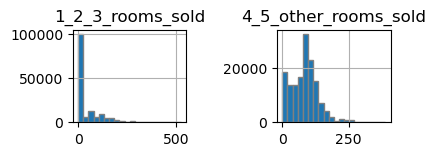

In [41]:
# Examining distributions of variables relating to rooms sold after combining

housing_num = housing[['1_2_3_rooms_sold', '4_5_other_rooms_sold']]

housing_num.hist(bins=20, figsize=(12, 25), edgecolor="gray", layout=(12, 5))
plt.subplots_adjust(hspace=0.8, wspace=0.8)


In [42]:
# We will drop these columns from analysis since they've been transformed
# Also dropping total dwelling units since they're highly correlated

housing.drop(columns = ['1room_sold', '2room_sold','3room_sold', '4room_sold', '5room_sold', 'exec_sold', 
                        'multigen_sold','studio_apartment_sold','total_dwelling_units'], inplace = True)

#### 4. Examining variables relating to distance from malls

In [43]:
# Looking at Mall distance variables

housing[['Mall_Nearest_Distance', 'Mall_Within_1km','Mall_Within_2km']].head()

Mall_Nearest_Distance  Mall_Within_1km  Mall_Within_2km
0            1094.090418              0.0              7.0
1             866.941448              1.0              3.0
2            1459.579948              0.0              4.0
3             950.175199              1.0              4.0
4             729.771895              1.0              2.0

In [44]:
# Checking for correlation between mall distance features

housing.loc[:,['Mall_Nearest_Distance', 'Mall_Within_1km','Mall_Within_2km', 'resale_price']].corr()

Mall_Nearest_Distance  Mall_Within_1km  \
Mall_Nearest_Distance               1.000000        -0.584623   
Mall_Within_1km                    -0.584623         1.000000   
Mall_Within_2km                    -0.204028         0.442000   
resale_price                       -0.071666         0.078815   

                       Mall_Within_2km  resale_price  
Mall_Nearest_Distance        -0.204028     -0.071666  
Mall_Within_1km               0.442000      0.078815  
Mall_Within_2km               1.000000      0.108648  
resale_price                  0.108648      1.000000

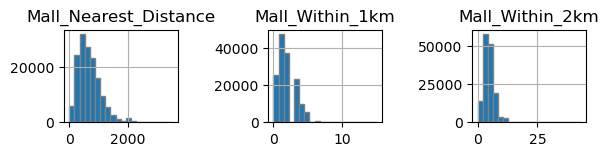

In [45]:
# Looking at the mall distance variables' distributions

mall_dists = housing[['Mall_Nearest_Distance', 'Mall_Within_1km', 'Mall_Within_2km']]

mall_dists.hist(bins=20, figsize=(12, 25), edgecolor="gray", layout=(12, 5))
plt.subplots_adjust(hspace=0.8, wspace=0.8)


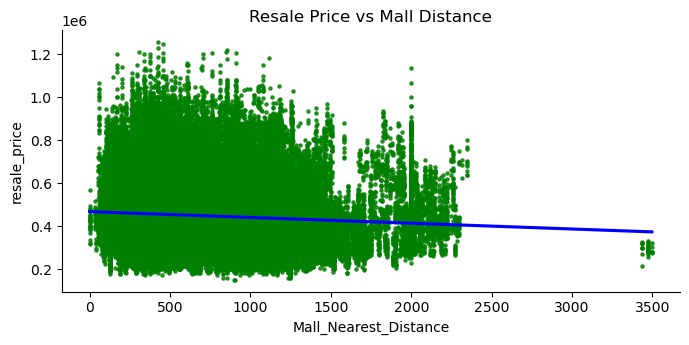

In [46]:
# Relationship between resale price and unit's distance from a mall

sns.lmplot(x="Mall_Nearest_Distance", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5},
           aspect=2, height=3.5,
           line_kws={"color": "blue"}).set(title='Resale Price vs Mall Distance')


Distance from a mall seems inversely correlated with resale price, so we will keep this variable.
Since 'Mall_Within_500m' and  'Mall_Within_1km' are both highly correlated with 'Mall_Within_2km', and the last one is best correlated with the dependent variable, we will drop the first 2 and just use Mall within 2km to see if the number of malls within a 2km radius impacts resale price.

In [47]:
housing.drop(columns = 'Mall_Within_1km', inplace = True)

#### 5. Examining variables relating to distance from hawkers¶

In [48]:
# Checking for correlation between hawker distance features

housing.loc[:,['Hawker_Nearest_Distance', 'Hawker_Within_1km', 'Hawker_Within_2km', 'resale_price']].corr()

Hawker_Nearest_Distance  Hawker_Within_1km  \
Hawker_Nearest_Distance                 1.000000          -0.605460   
Hawker_Within_1km                      -0.605460           1.000000   
Hawker_Within_2km                      -0.596336           0.830260   
resale_price                           -0.014537           0.090516   

                         Hawker_Within_2km  resale_price  
Hawker_Nearest_Distance          -0.596336     -0.014537  
Hawker_Within_1km                 0.830260      0.090516  
Hawker_Within_2km                 1.000000      0.183168  
resale_price                      0.183168      1.000000

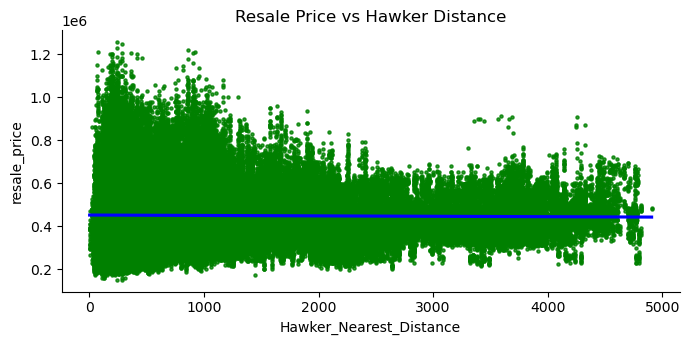

In [49]:
# Examining relationship between resale price and unit's distance from hawkers

sns.lmplot(x="Hawker_Nearest_Distance", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5},
           aspect=2, height=3.5,
           line_kws={"color": "blue"}).set(title='Resale Price vs Hawker Distance')

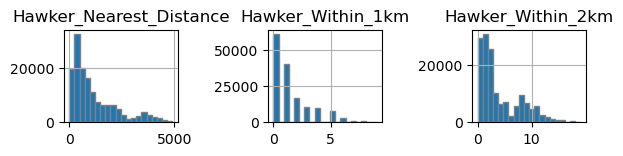

In [50]:
# Looking at the hawker distance variables' distributions

hawker_dists = housing[['Hawker_Nearest_Distance', 'Hawker_Within_1km', 'Hawker_Within_2km']]

hawker_dists.hist(bins=20, figsize=(12, 25), edgecolor="gray", layout=(12, 5))
plt.subplots_adjust(hspace=0.8, wspace=0.8)


In [51]:
# Will do the same for hawkers 

housing.drop(columns = 'Hawker_Within_1km', inplace = True)

#### 5. Examining variables relating to unit size and amenities

In [52]:
# Looking at variables relating to unit size and profile

housing[['storey_range','floor_area_sqm', 'lease_commence_date', 'mid_storey', 
         'lower', 'upper', 'mid','floor_area_sqft', 'hdb_age','max_floor_lvl', 
         'year_completed', 'commercial', 'market_hawker','multistorey_carpark',
         'precinct_pavilion', 'Tranc_YearMonth', 'Tranc_Year', 'Tranc_Month']].head()

storey_range  floor_area_sqm  lease_commence_date  mid_storey  lower  upper  \
0     10 TO 12            90.0                 2006          11     10     12   
1     07 TO 09           130.0                 1987           8      7      9   
2     13 TO 15           144.0                 1997          14     13     15   
3     01 TO 05           103.0                 1992           3      1      5   
4     01 TO 03            83.0                 1987           2      1      3   

   mid  floor_area_sqft  hdb_age  max_floor_lvl  year_completed commercial  \
0   11          968.760       15             25            2005          N   
1    8         1399.320       34              9            1987          N   
2   14         1550.016       24             16            1996          N   
3    3         1108.692       29             11            1990          Y   
4    2          893.412       34              4            1987          N   

  market_hawker multistorey_carpark precinct_pavilion Tranc_YearMonth  \
0             N                   N                 N         2016-05   
1             N                   N                 N         2012-07   
2             N                   N                 N         2013-07   
3             N                   N                 N         2012-04   
4             N                   N                 N         2017-12   

   Tranc_Year  Tranc_Month  
0        2016            5  
1        2012            7  
2        2013            7  
3        2012            4  
4        2017           12

There are quite a few variables that are about the floor level, but none specify which floor the unit is on. We'll take the mid-storey as the estimated floor level and drop all the other related variables since they provide limited useful information.

In [53]:
# replace all storey-related variables with mid-storey as the estimated median height  

housing['est_floor_level'] = housing['mid_storey'] 
housing.drop(columns = ['storey_range', 'lower','upper', 'mid','mid_storey','max_floor_lvl'], inplace = True)

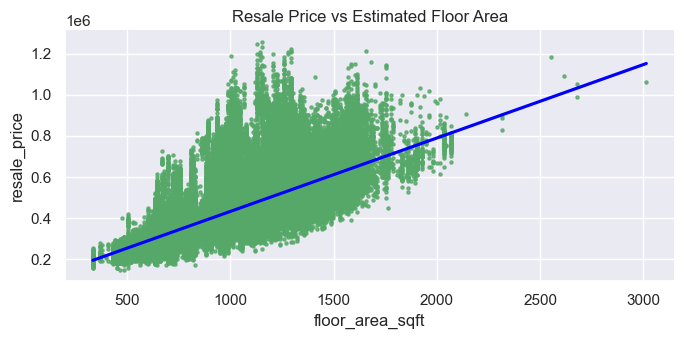

In [54]:
# Examining relationship between resale price and unit's floor area

sns.set(rc={"figure.figsize":(14,7)})
sns.lmplot(x="floor_area_sqft", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5},
           aspect=2, height=3.5,
           line_kws={"color": "blue"}).set(title='Resale Price vs Estimated Floor Area')

In general, bigger homes fetch higher prices.

In [55]:
# To use floor_area_sqft instead of floor_area_sqm for size of flat since they're substitutes

housing.drop(columns = 'floor_area_sqm', inplace = True)

In [56]:
# Creating a new variable to estimate the unit's age at the point of transaction 
# Existing time-related variables are less relevant because they look at absolute age of the unit
# Dropping the other variables 

housing['age_at_sale'] = housing['Tranc_Year'] - housing['lease_commence_date']

housing.drop(columns = 
             ['hdb_age','year_completed','Tranc_YearMonth','lease_commence_date'], 
             inplace = True)

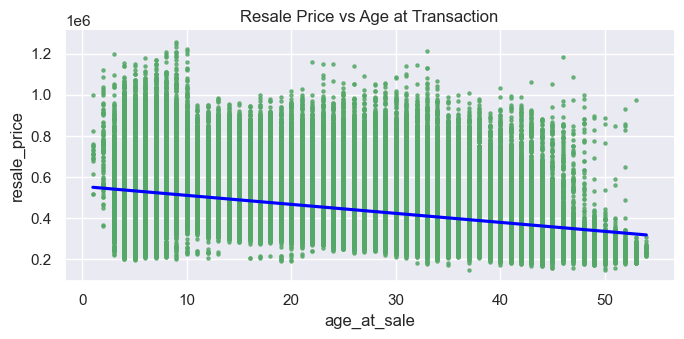

In [57]:
# Examining relationship between resale price and unit's age at point of transaction

sns.set(rc={"figure.figsize":(8,8)})
sns.lmplot(x="age_at_sale", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5},
           aspect=2, height=3.5,
           line_kws={"color": "blue"}).set(title='Resale Price vs Age at Transaction')

It seems like the older the unit, the lower the predicted resale price.

#### 6. Examining variables relating to schools

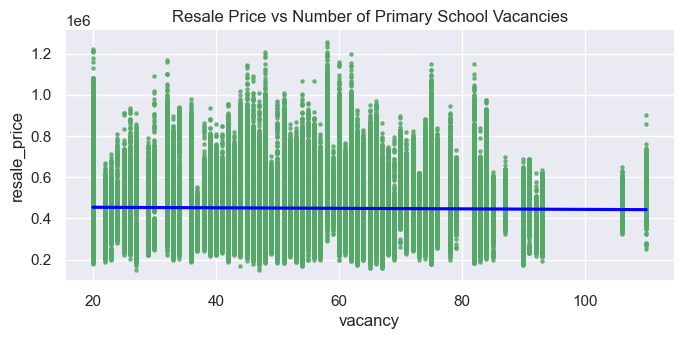

In [58]:
# Examining relationship between resale price and number of pri sch vacancies

sns.set(rc={"figure.figsize":(8,8)})
sns.lmplot(x="vacancy", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5},
           aspect=2, height=3.5,
           line_kws={"color": "blue"}).set(title='Resale Price vs Number of Primary School Vacancies')

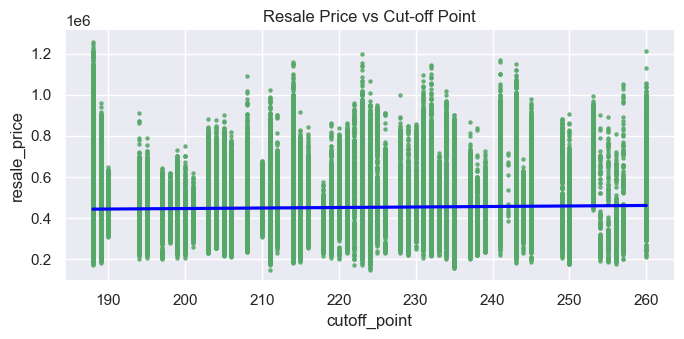

In [59]:
# Examining relationship between resale price and cut-off point

sns.set(rc={"figure.figsize":(8,8)})
sns.lmplot(x="cutoff_point", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5},
           aspect=2, height=3.5,
           line_kws={"color": "blue"}).set(title='Resale Price vs Cut-off Point')

In [60]:
# To drop both variables given that resale price seems unaffected by either

housing.drop(columns = ['cutoff_point', 'vacancy'], inplace = True)

#### 7. Normalising the distributions of remaining variables

In [61]:
# Changing type of mrt and bus interchange to categorical since they're essentially boolean

housing['bus_interchange'] = housing['bus_interchange'].astype('object')


We'll be converting the following variables to categorical since we're interested to see which year or month might have higher/lower resale prices not looking at longitudinal trends over time, whereby we would convert to datetime type instead.

In [62]:
# Converting transaction year and month to categorical variables

housing['Tranc_Year'] = housing['Tranc_Year'].astype('object')
housing['Tranc_Month'] = housing['Tranc_Month'].astype('object')

Text(0.5, 1.0, 'Distributions of Numerical Features')

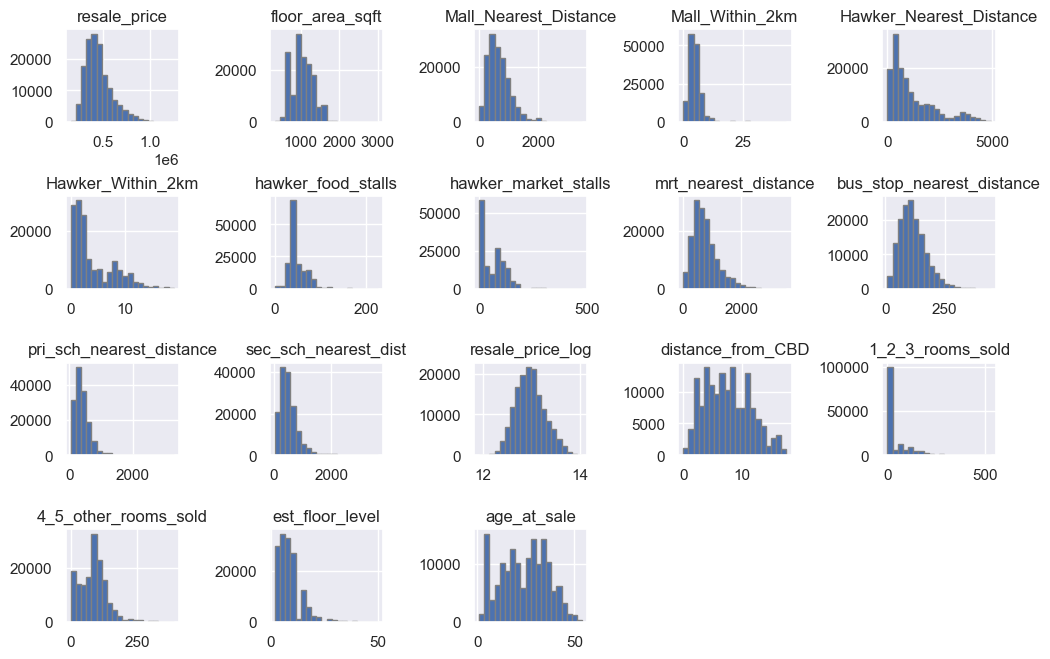

In [63]:
# Re-examining the distributions of remaining numerical variables

housing_num = housing.select_dtypes("number")
housing_num.hist(bins=20, figsize=(12, 25), edgecolor="gray", layout=(12, 5))
plt.subplots_adjust(hspace=0.8, wspace=0.8)

plt.title('Distributions of Numerical Features', fontsize=12)

In [64]:
housing.head()

id             town  flat_type block       street_name  flat_model  \
0   88471  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD     Model A   
1  122598           BISHAN     5 ROOM   153      BISHAN ST 13    Improved   
2  170897      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   Apartment   
3   86070           BISHAN     4 ROOM   232      BISHAN ST 22     Model A   
4  153632           YISHUN     4 ROOM   876      YISHUN ST 81  Simplified   

   resale_price Tranc_Year Tranc_Month       full_flat_type  \
0      680000.0       2016           5       4 ROOM Model A   
1      665000.0       2012           7      5 ROOM Improved   
2      838000.0       2013           7  EXECUTIVE Apartment   
3      550000.0       2012           4       4 ROOM Model A   
4      298000.0       2017          12    4 ROOM Simplified   

                address  floor_area_sqft residential commercial market_hawker  \
0  3B, UPP BOON KENG RD          968.760           Y          N             N   
1     153, BISHAN ST 13         1399.320           Y          N             N   
2  289B, BT BATOK ST 25         1550.016           Y          N             N   
3     232, BISHAN ST 22         1108.692           Y          Y             N   
4     876, YISHUN ST 81          893.412           Y          N             N   

  multistorey_carpark precinct_pavilion planning_area  Mall_Nearest_Distance  \
0                   N                 N       Kallang            1094.090418   
1                   N                 N        Bishan             866.941448   
2                   N                 N   Bukit Batok            1459.579948   
3                   N                 N        Bishan             950.175199   
4                   N                 N        Yishun             729.771895   

   Mall_Within_2km  Hawker_Nearest_Distance  Hawker_Within_2km  \
0              7.0               154.753357               13.0   
1              3.0               640.151925                7.0   
2              4.0              1762.082341                1.0   
3              4.0               726.215262                9.0   
4              2.0              1540.151439                1.0   

   hawker_food_stalls  hawker_market_stalls  mrt_nearest_distance  \
0                  84                    60            330.083069   
1                  80                    77            903.659703   
2                  84                    95           1334.251197   
3                  32                    86            907.453484   
4                  45                     0            412.343032   

      mrt_name bus_interchange  bus_stop_nearest_distance  \
0      Kallang               0                  29.427395   
1       Bishan               1                  58.207761   
2  Bukit Batok               1                 214.747860   
3       Bishan               1                  43.396521   
4       Khatib               0                 129.422752   

              bus_stop_name  pri_sch_nearest_distance  \
0                    Blk 3B               1138.633422   
1              BLK 151A MKT                415.607357   
2                  Blk 289E                498.849039   
3  Opp Bishan Nth Shop Mall                389.515528   
4                   Blk 873                401.200584   

                            pri_sch_name  sec_sch_nearest_dist  \
0               Geylang Methodist School           1138.633422   
1  Kuo Chuan Presbyterian Primary School            447.894399   
2                  Keming Primary School            180.074558   
3                   Catholic High School            389.515528   
4              Naval Base Primary School            312.025435   

                              sec_sch_name  resale_price_log  \
0                 Geylang Methodist School         13.429848   
1  Kuo Chuan Presbyterian Secondary School         13.407542   
2             Yusof Ishak Secondary School         13.638773   
3                     

Most variables have a right skew. We will log all numerical variables to normalise the distribution in preparation for linear regression modelling. 

In [65]:
# To log all variables with large scales, but first replace 0 with 1 since log(1) will revert the values to 0

cols2 = ['Mall_Nearest_Distance', 'Mall_Within_2km', 'Hawker_Within_2km', 
         'hawker_food_stalls', 'hawker_market_stalls', '1_2_3_rooms_sold', '4_5_other_rooms_sold']

result = [housing_num[x].replace({0:1}, inplace = True) for x in cols2]


In [66]:
housing_num.head()

resale_price  floor_area_sqft  Mall_Nearest_Distance  Mall_Within_2km  \
0      680000.0          968.760            1094.090418              7.0   
1      665000.0         1399.320             866.941448              3.0   
2      838000.0         1550.016            1459.579948              4.0   
3      550000.0         1108.692             950.175199              4.0   
4      298000.0          893.412             729.771895              2.0   

   Hawker_Nearest_Distance  Hawker_Within_2km  hawker_food_stalls  \
0               154.753357               13.0                  84   
1               640.151925                7.0                  80   
2              1762.082341                1.0                  84   
3               726.215262                9.0                  32   
4              1540.151439                1.0                  45   

   hawker_market_stalls  mrt_nearest_distance  bus_stop_nearest_distance  \
0                    60            330.083069                  29.427395   
1                    77            903.659703                  58.207761   
2                    95           1334.251197                 214.747860   
3                    86            907.453484                  43.396521   
4                     1            412.343032                 129.422752   

   pri_sch_nearest_distance  sec_sch_nearest_dist  resale_price_log  \
0               1138.633422           1138.633422         13.429848   
1                415.607357            447.894399         13.407542   
2                498.849039            180.074558         13.638773   
3                389.515528            389.515528         13.217674   
4                401.200584            312.025435         12.604849   

   distance_from_CBD  1_2_3_rooms_sold  4_5_other_rooms_sold  est_floor_level  \
0           3.531288                 1                   142               11   
1           2.342733                 1                   112                8   
2           9.278799                 1                    90               14   
3           2.223405                 1                    75                3   
4           3.776670                 1                    48                2   

   age_at_sale  
0           10  
1           25  
2           16  
3           20  
4           30

In [67]:
# Applying log-scaling to numerical variables

housing_num.drop(columns = ['resale_price', 'resale_price_log'], inplace = True)
housing[housing_num.columns] = np.log(housing_num)


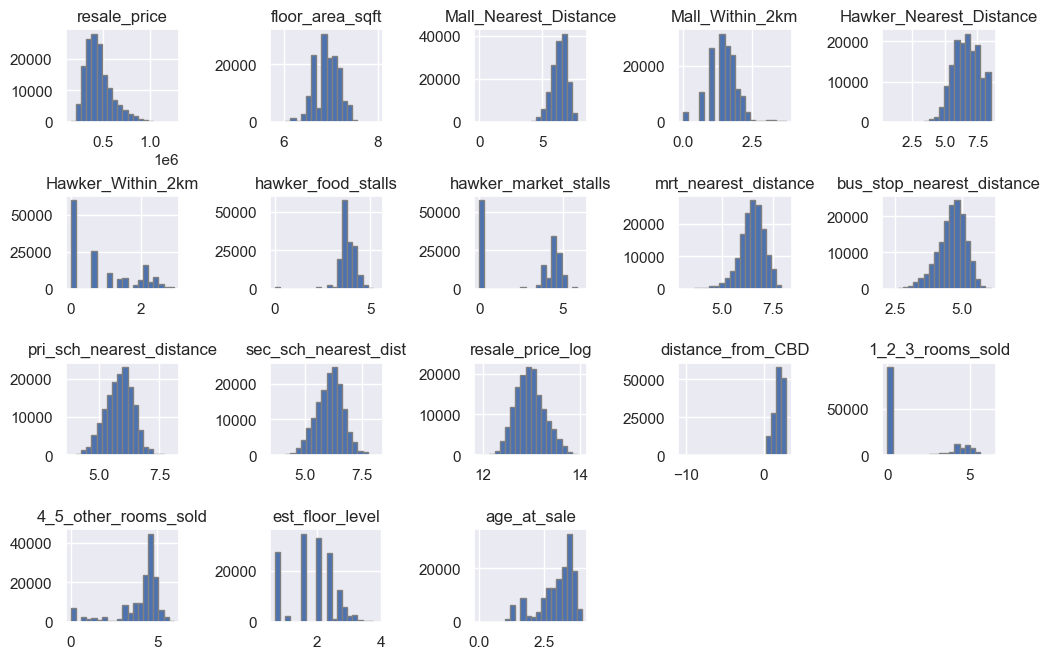

In [68]:
# examining the output after log transformation

housing.hist(bins=20, figsize=(12, 25), edgecolor="gray", layout=(12, 5))
plt.subplots_adjust(hspace=0.8, wspace=0.8)

### Looking at Categorical variables

In general, while we want variables to add relevant information in a model to better predict resale prices, at the same time we want to minimise the risk of increasing the dimensionality of the dataset to the point where the model becomes unneccesarily complex, overfitted, or bloated (leading to excessively long processing times). We will keep in mind the number of one-hot encoded variables that will be created if we include a categorical feature into the model during feature selection.

#### 1. Flat Types

In [69]:
# Looking at flat type columns, which seem similar...

housing[['flat_model', 'full_flat_type', 'flat_type']].head()

flat_model       full_flat_type  flat_type
0     Model A       4 ROOM Model A     4 ROOM
1    Improved      5 ROOM Improved     5 ROOM
2   Apartment  EXECUTIVE Apartment  EXECUTIVE
3     Model A       4 ROOM Model A     4 ROOM
4  Simplified    4 ROOM Simplified     4 ROOM

Text(0.5, 1.0, 'Resale Price by Flat Model')

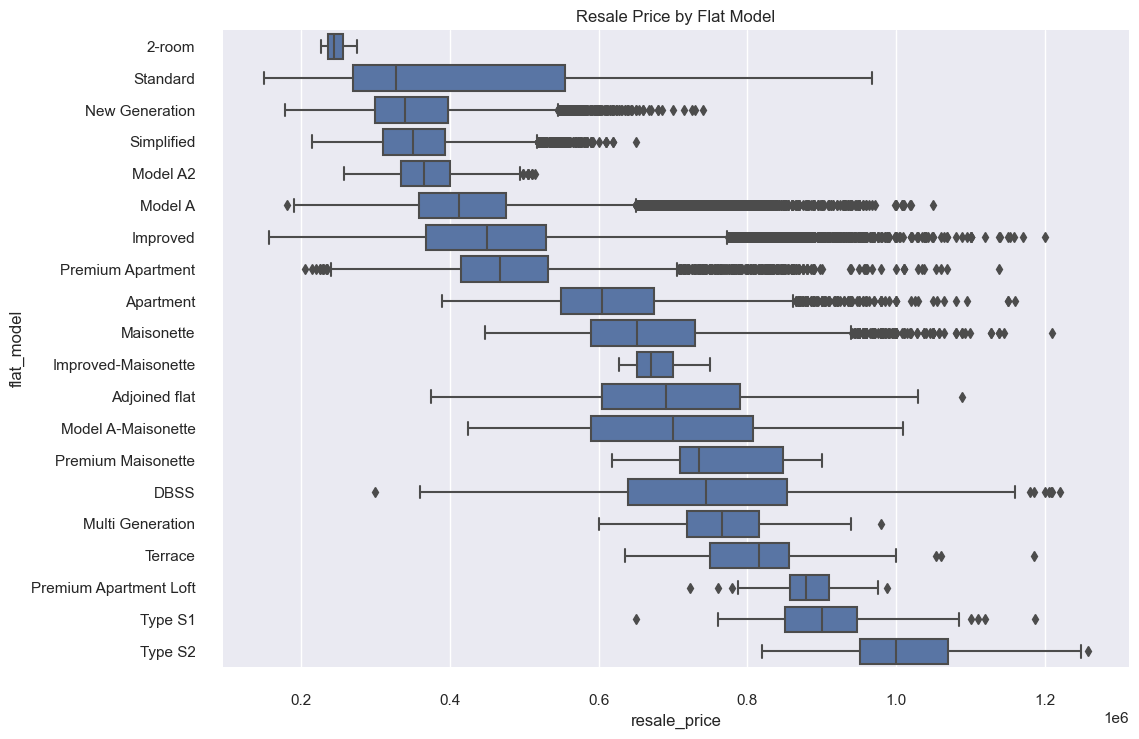

In [70]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

my_order = housing.groupby(by=["flat_model"])["resale_price"].median().sort_values().index

sns.boxplot(y="flat_model", x="resale_price",
            palette=["b"],
            data=housing,
            order = my_order)

sns.despine(offset=10, trim=True)

plt.title("Resale Price by Flat Model") 

Text(0.5, 1.0, 'Resale Price by Full Flat Type')

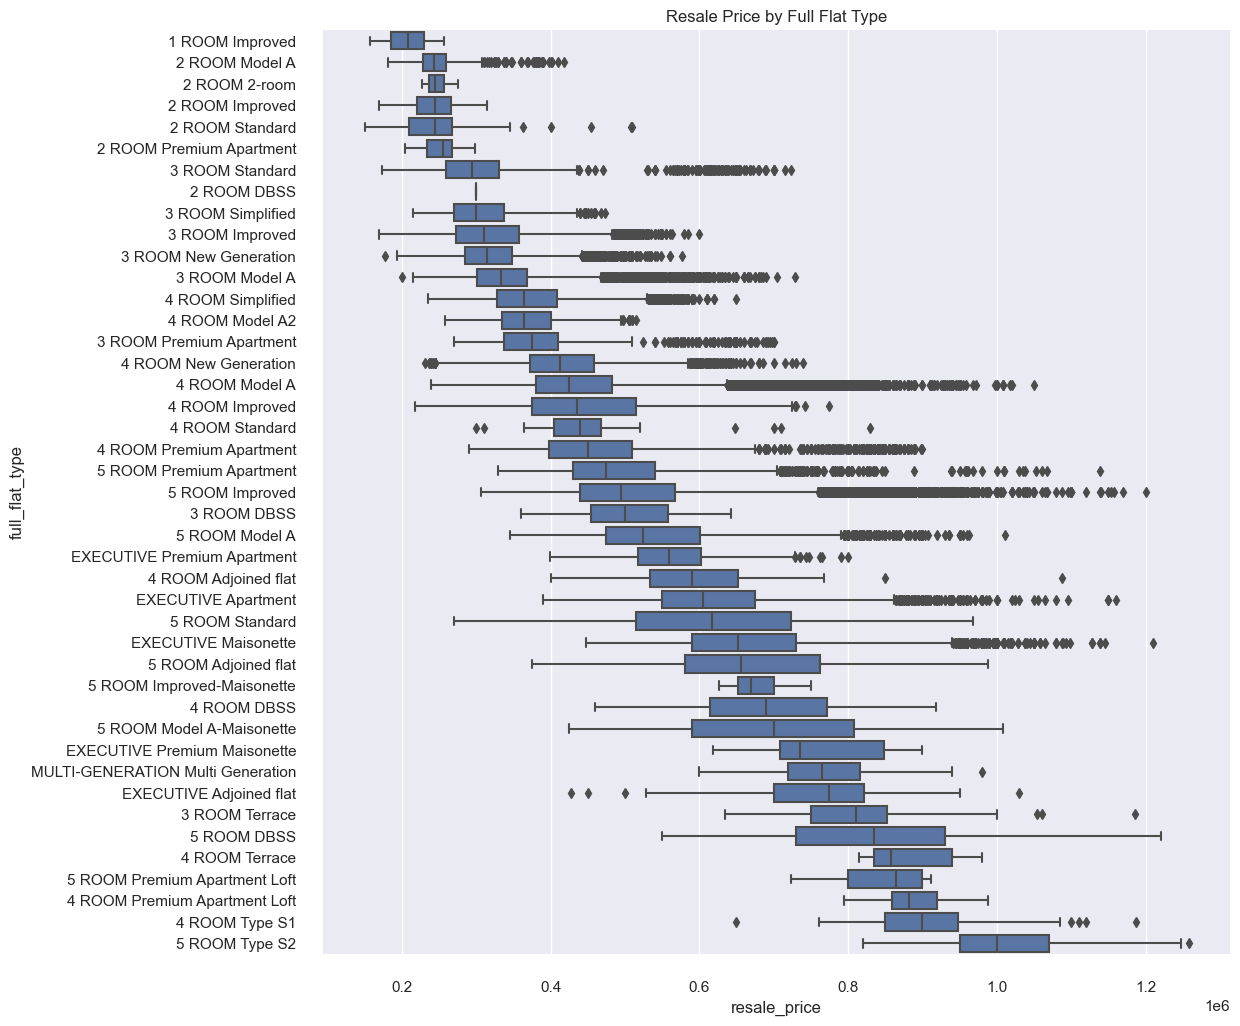

In [71]:
sns.set(rc={'figure.figsize':(11.7,12)})

my_order = housing.groupby(by=["full_flat_type"])["resale_price"].median().sort_values().index

sns.boxplot(y="full_flat_type", x="resale_price",
            palette=["b"],
            data=housing,
            order = my_order)
sns.despine(offset=10, trim=True)

plt.title("Resale Price by Full Flat Type") 

Text(0.5, 1.0, 'Resale Price by Flat Type')

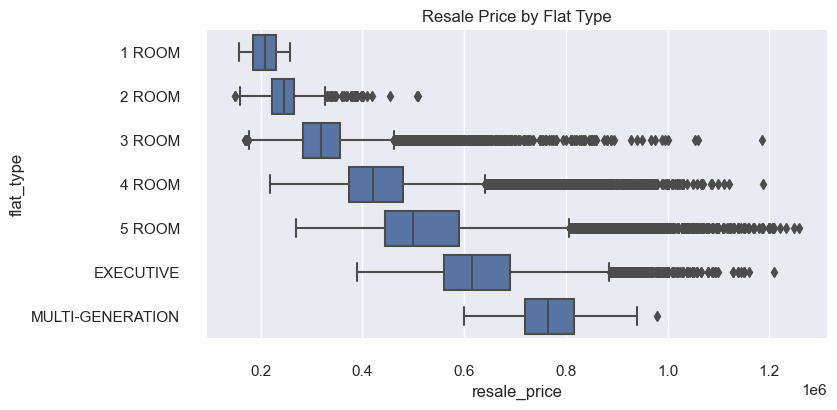

In [72]:
sns.set(rc={'figure.figsize':(8,4)})

sns.boxplot(y="flat_type", x="resale_price",
            palette=["b"],
            data=housing,
            order=['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'])
sns.despine(offset=10, trim=True)

plt.title("Resale Price by Flat Type") 


We will drop full_flat_type due to its high granularity as a categorical variable (which would create a large number of dummy variables). To use flat_model and flat_type instead.

Resale prices by flat type imply potential interaction effect with floor size of the unit. Larger units like 4-room and 5-room ones have median higher resale prices.

In [73]:
# Dropping full flat type

housing.drop(columns = ['full_flat_type'], inplace = True)

#### 2. Location and address

In [74]:
# Getting categorical location-type columns... 

housing[['town', 'street_name', 'block', 'address', 'planning_area', 'mrt_name', 'bus_stop_name']].head()

town       street_name block               address  \
0  KALLANG/WHAMPOA  UPP BOON KENG RD    3B  3B, UPP BOON KENG RD   
1           BISHAN      BISHAN ST 13   153     153, BISHAN ST 13   
2      BUKIT BATOK    BT BATOK ST 25  289B  289B, BT BATOK ST 25   
3           BISHAN      BISHAN ST 22   232     232, BISHAN ST 22   
4           YISHUN      YISHUN ST 81   876     876, YISHUN ST 81   

  planning_area     mrt_name             bus_stop_name  
0       Kallang      Kallang                    Blk 3B  
1        Bishan       Bishan              BLK 151A MKT  
2   Bukit Batok  Bukit Batok                  Blk 289E  
3        Bishan       Bishan  Opp Bishan Nth Shop Mall  
4        Yishun       Khatib                   Blk 873

In [75]:
# Calculating the median resale price by mrt station

mrt_med_price = housing.groupby('mrt_name')['resale_price'].median().sort_values(ascending = False)

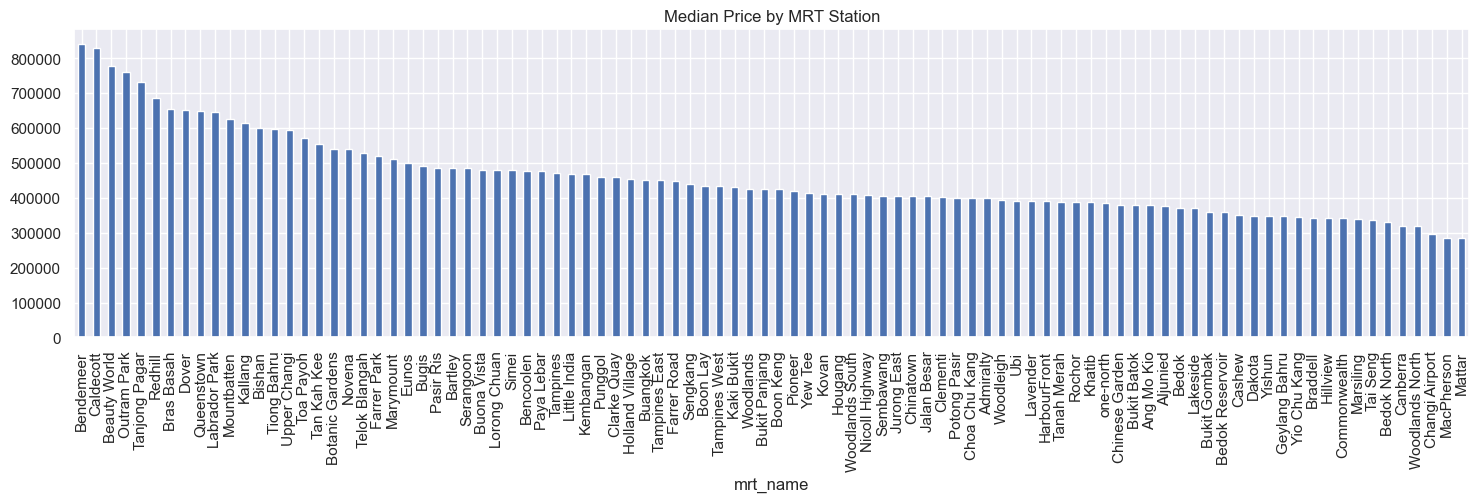

In [76]:
# Visualising the median resale price by mrt station

mrt_med_price.plot.bar(figsize=(18,4)).set(title='Median Price by MRT Station')
plt.show()

The specific mrt station that is near the residential unit seems to also impact resale price. Not all mrt stations are equal. 

There are over 1.6k possible values in bus_stop_name. Creates too many dimensions with limited info (alot of 0s and a single 1 per column) We will drop this from the model. 

In [77]:
bus_stop_resale = housing.groupby('bus_stop_name')['resale_price'].median().sort_values(ascending = False)
bus_stop_resale.head()

bus_stop_name
Pei Hwa Presby Pr Sch      952500.0
Bef The Pinnacle@Duxton    950000.0
Queenstown Polyclinic      928000.0
Maritime Hse               902000.0
Blk 101C CP                880000.0
Name: resale_price, dtype: float64

Text(0.5, 1.0, 'Resale Price by Planning Area')

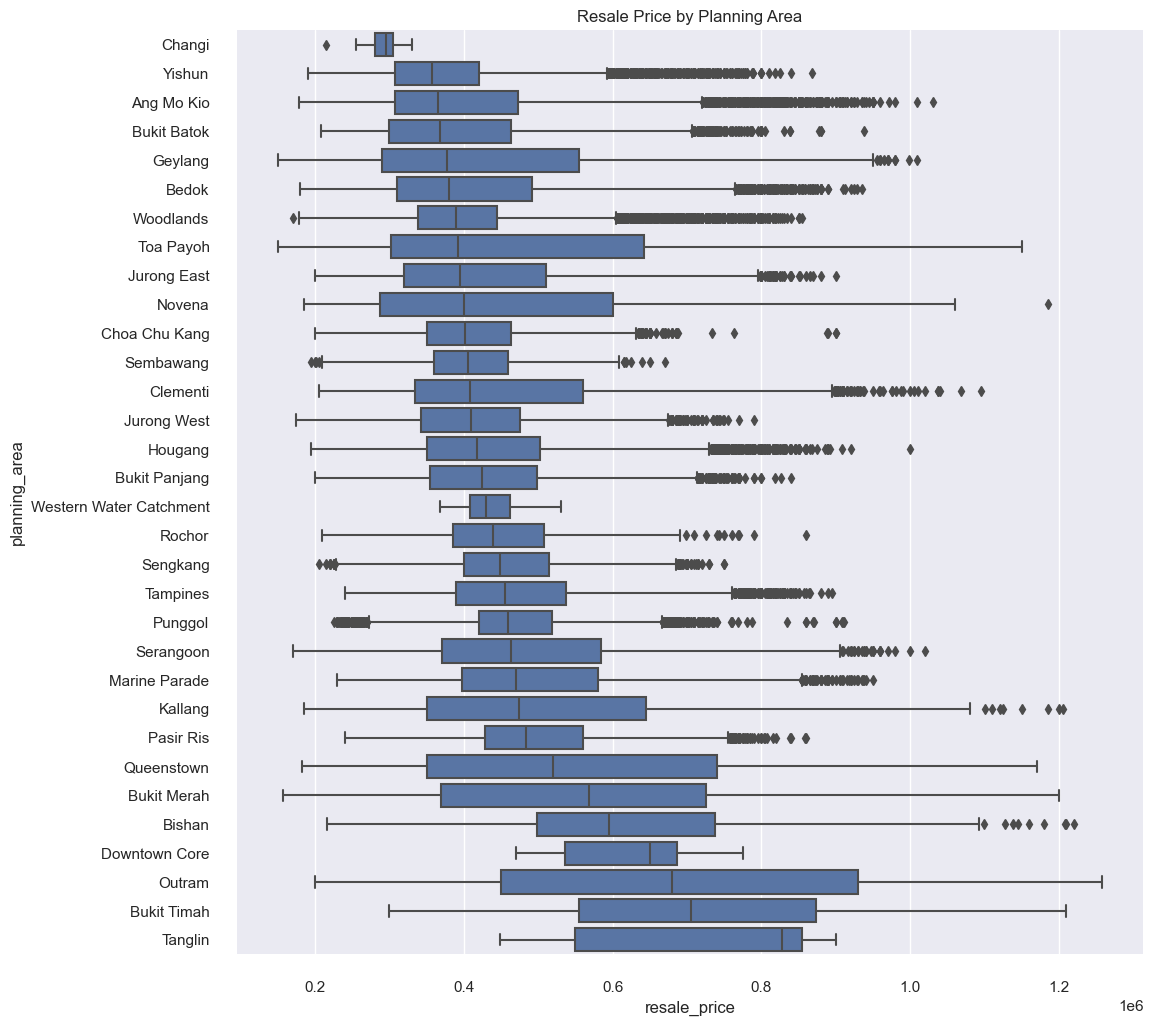

In [78]:
# Boxplot for planning area

my_order = housing.groupby(by=["planning_area"])["resale_price"].median().sort_values().index

sns.set(rc={'figure.figsize':(11.7,12)})

sns.boxplot(y="planning_area", x="resale_price",
            palette=["b"],
            data=housing,
            order = my_order)
sns.despine(offset=10, trim=True)

plt.title("Resale Price by Planning Area") 

Text(0.5, 1.0, 'Resale Price by Town')

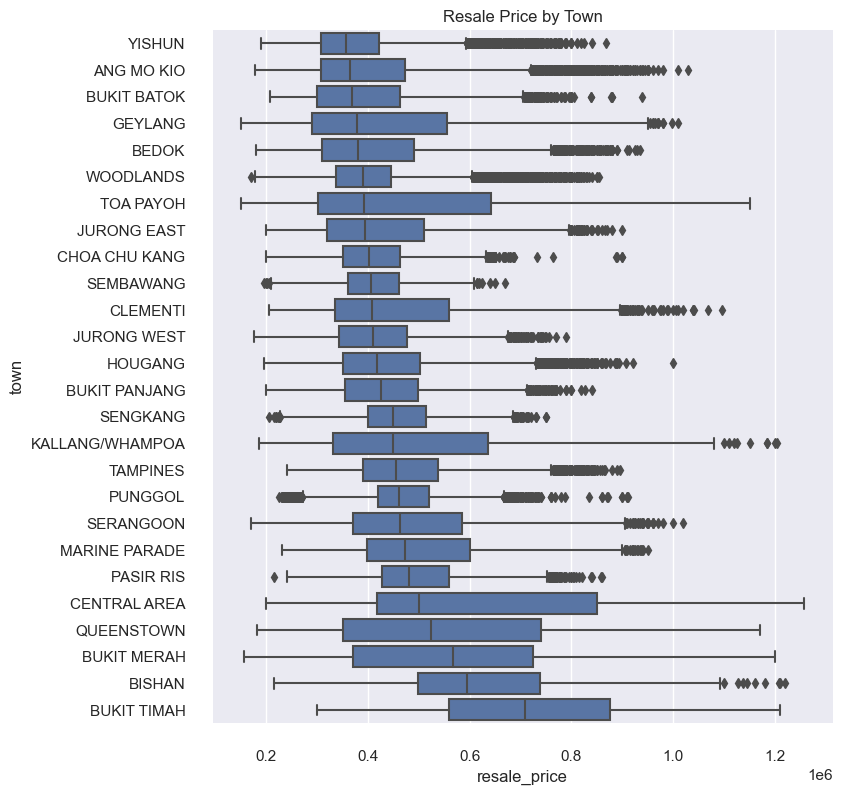

In [79]:
# Boxplot for town

my_order = housing.groupby(by=["town"])["resale_price"].median().sort_values().index

sns.set(rc={'figure.figsize':(8,9)})

sns.boxplot(y="town", x="resale_price",
            palette=["b"],
            data=housing,
            order = my_order)
sns.despine(offset=10, trim=True)

plt.title("Resale Price by Town") 

The neighbourhood of a housing unit has a clear relationship with median resale price, although certain estates have unexpected outliers that can fetch unexpected high prices. This might be due to the presence of certain unit types with a larger floor area.

In [80]:
# Drop town, street name, address, mrt_name, to use 'planning_area' for location
# To also drop bus_stop_name due to granularity issues - too many small counts

housing.drop(columns = ['town', 'street_name', 'block', 'address', 'mrt_name','bus_stop_name'], inplace = True)

In [81]:
# Bus interchange on resale price

housing.groupby('bus_interchange')['resale_price'].median()

bus_interchange
0    410000.0
1    430000.0
Name: resale_price, dtype: float64

The presence of a bus interchange doesn't seem to affect resale price much, probably because people just need a nearby bus stop to access a range of possible buses to their destination rather than an interchange. Will drop this variable.

In [82]:
housing.drop(columns = 'bus_interchange', inplace = True)

#### 3. Amenities

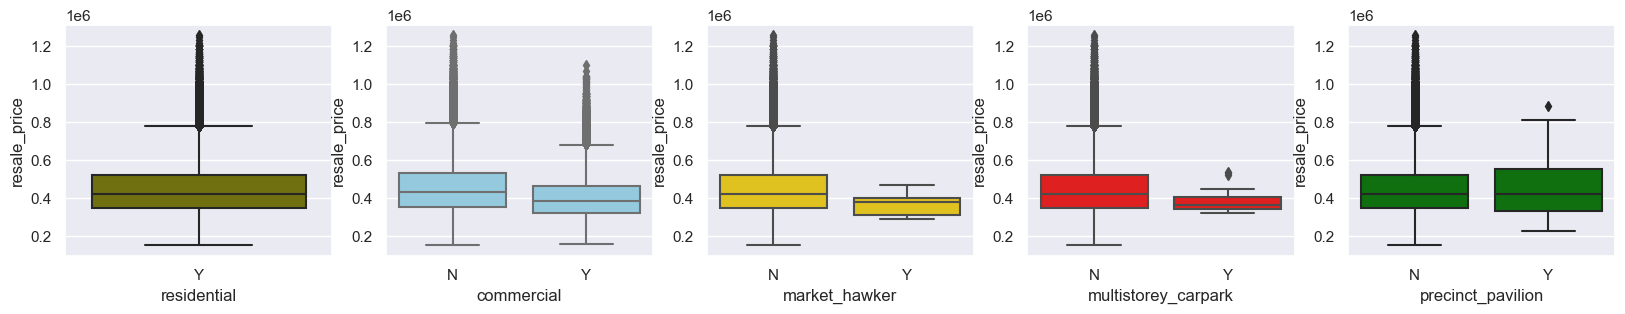

In [83]:
# Looking at amenity-related variables by relationship to resale price

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 5, figsize=(20, 3))
df = housing

sns.boxplot(data=df, x="residential", y = "resale_price", color="olive", ax=axs[0])
sns.boxplot(data=df, x="commercial", y = "resale_price", color="skyblue", ax=axs[1])
sns.boxplot(data=df, x="market_hawker", y = "resale_price", color="gold", ax=axs[2])
sns.boxplot(data=df, x="multistorey_carpark", y = "resale_price", color="red", ax=axs[3])
sns.boxplot(data=df, x="precinct_pavilion", y = "resale_price", color="green", ax=axs[4])

plt.show()

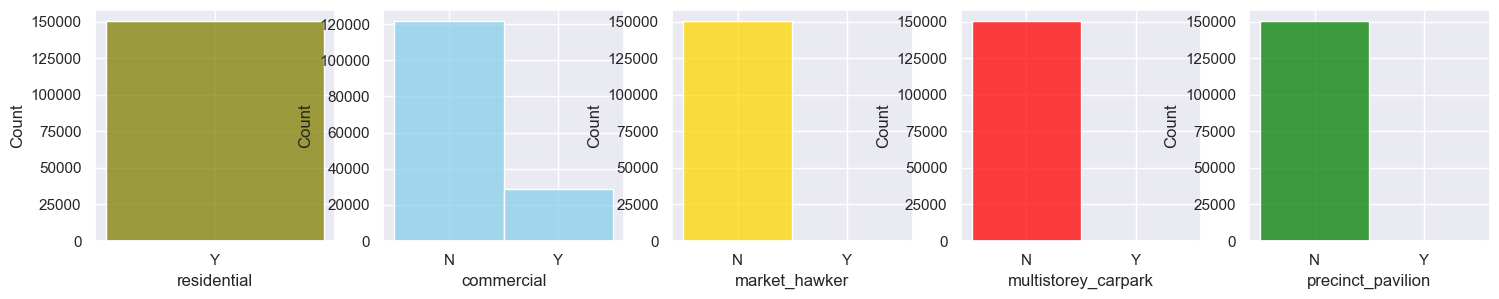

In [84]:
# Looking at amenity-related variables by count

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 5, figsize=(18, 3))
df = housing

sns.histplot(data=df, x="residential",  color="olive", ax=axs[0])
sns.histplot(data=df, x="commercial",  color="skyblue", ax=axs[1])
sns.histplot(data=df, x="market_hawker",  color="gold", ax=axs[2])
sns.histplot(data=df, x="multistorey_carpark",  color="red", ax=axs[3])
sns.histplot(data=df, x="precinct_pavilion", color="green", ax=axs[4])

plt.show()

All records are residential units, and there are very few counts for units with market hawkers, multistorey carparks and precinct pavilions. 

In [85]:
# Keeping only commercial and dropping the rest due to sparsity of data. 

housing.drop(columns = ['residential','market_hawker','multistorey_carpark', 
                        'precinct_pavilion'], inplace = True)

#### 4. Primary and Secondary School 

In [86]:
# Calculating the median resale price by mrt station

pri_sch_name_med_price = housing.groupby('pri_sch_name')['resale_price'].median().sort_values(ascending = False)

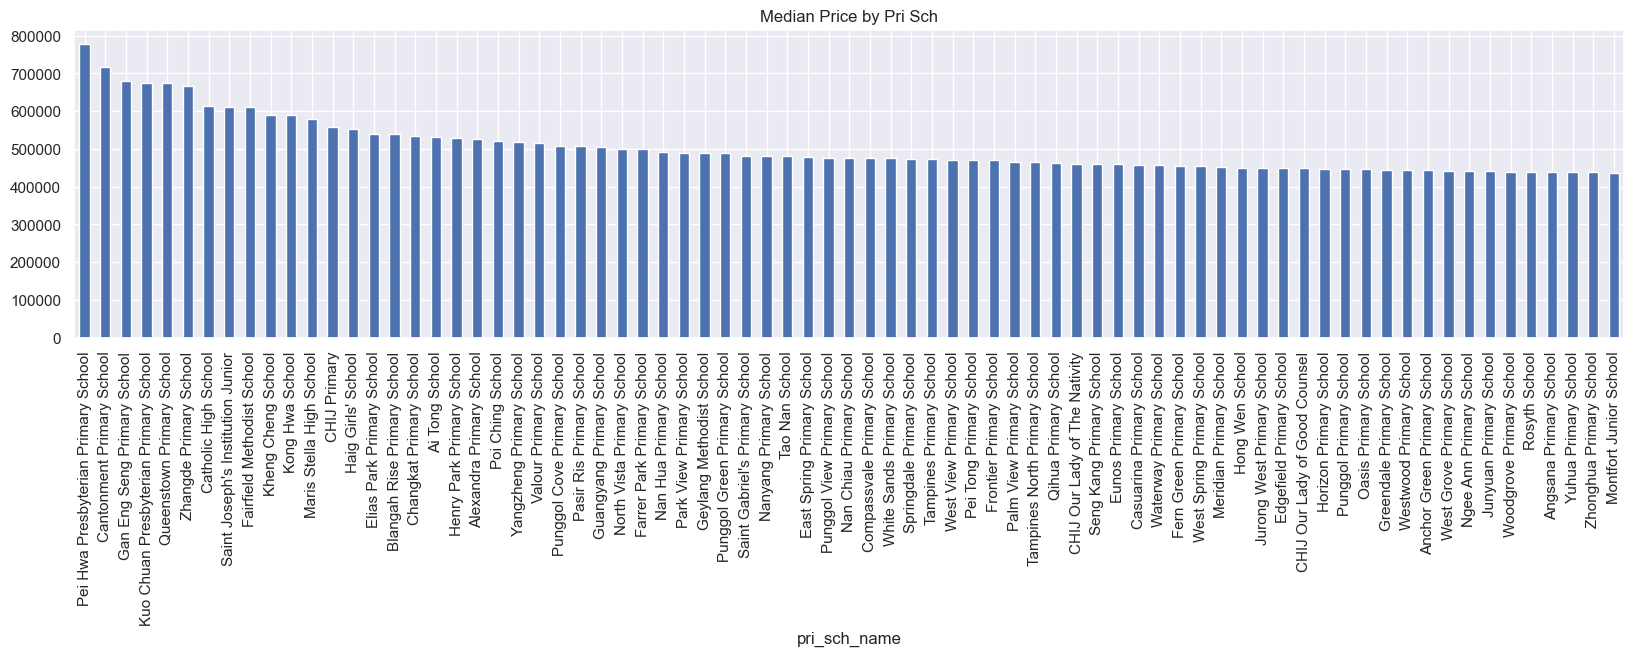

In [87]:
# Visualising the median resale price by mrt station

pri_sch_name_med_price.head(75).plot.bar(figsize=(20,4)).set(title='Median Price by Pri Sch')
plt.show()

In [88]:
# Calculating the median resale price by mrt station

sec_sch_name_med_price = housing.groupby('sec_sch_name')['resale_price'].median().sort_values(ascending = False)

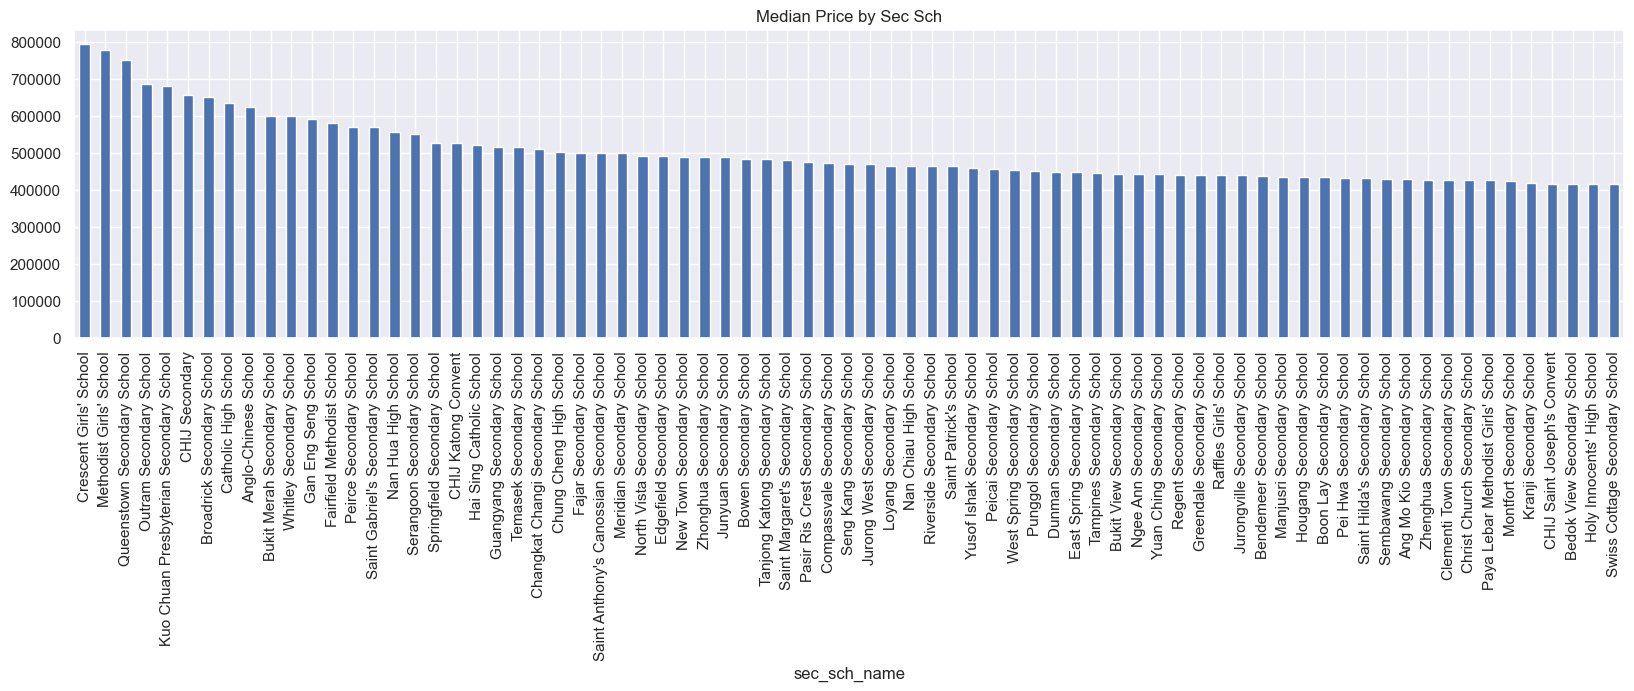

In [89]:
# Visualising the median resale price by mrt station

sec_sch_name_med_price.head(75).plot.bar(figsize=(20,4)).set(title='Median Price by Sec Sch')
plt.show()

Corresponding with external research, the barplots show primary and secondary schools have a clear effect on housing resale prices. The specific school name also seems to make a difference. We will keep these variables in the model.

#### 5. Transaction Year and Month

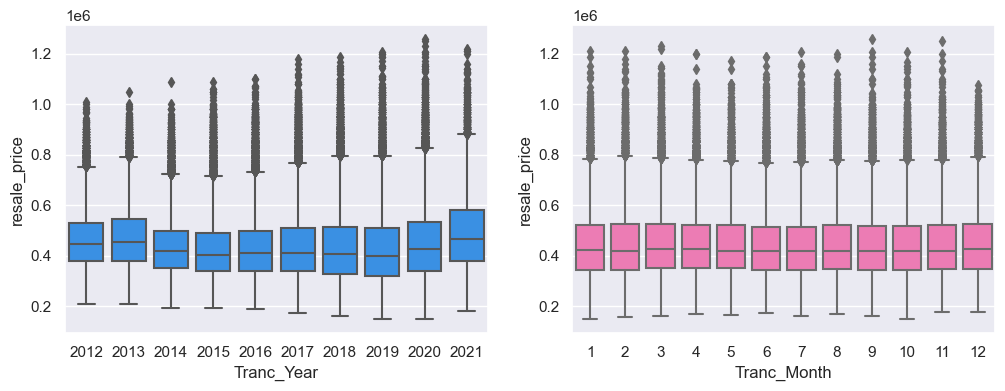

In [90]:
# Looking at the year and month distributions

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize=(12,4))
df = housing

sns.boxplot(data=df, x="Tranc_Year", y = "resale_price", color="dodgerblue", ax=axs[0])
sns.boxplot(data=df, x="Tranc_Month", y = "resale_price", color="hotpink", ax=axs[1])

plt.show()

Looks like the year of transaction has some impact on resale price, while there are minimal differences by month. We will drop transaction month from consideration as a predictor.

In [91]:
# Dropping transaction month as it doesn't have much variation in relation to resale price

housing.drop(columns = ['Tranc_Month'], inplace = True)

### Looking at skew and multicollinearity

In [92]:
# Checking for skewness of variables

housing.skew().sort_values(ascending=False).round(2)

/var/folders/r9/9246nqp9249ghjl6r9xy_dwr0000gn/T/ipykernel_24032/3820577826.py:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.skew().sort_values(ascending=False).round(2)


resale_price                 1.08
1_2_3_rooms_sold             0.67
Hawker_Within_2km            0.42
resale_price_log             0.25
Mall_Within_2km              0.03
id                          -0.00
Tranc_Year                  -0.14
pri_sch_nearest_distance    -0.17
sec_sch_nearest_dist        -0.19
Hawker_Nearest_Distance     -0.21
floor_area_sqft             -0.35
est_floor_level             -0.35
hawker_market_stalls        -0.41
bus_stop_nearest_distance   -0.55
mrt_nearest_distance        -0.60
Mall_Nearest_Distance       -0.70
age_at_sale                 -1.08
4_5_other_rooms_sold        -1.92
distance_from_CBD           -2.46
hawker_food_stalls          -3.50
dtype: float64

Data is not too skewed for most variables.

/var/folders/r9/9246nqp9249ghjl6r9xy_dwr0000gn/T/ipykernel_24032/28996482.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = housing.corr()


Text(0.5, 1.0, 'Correlation Heatmap of Variables')

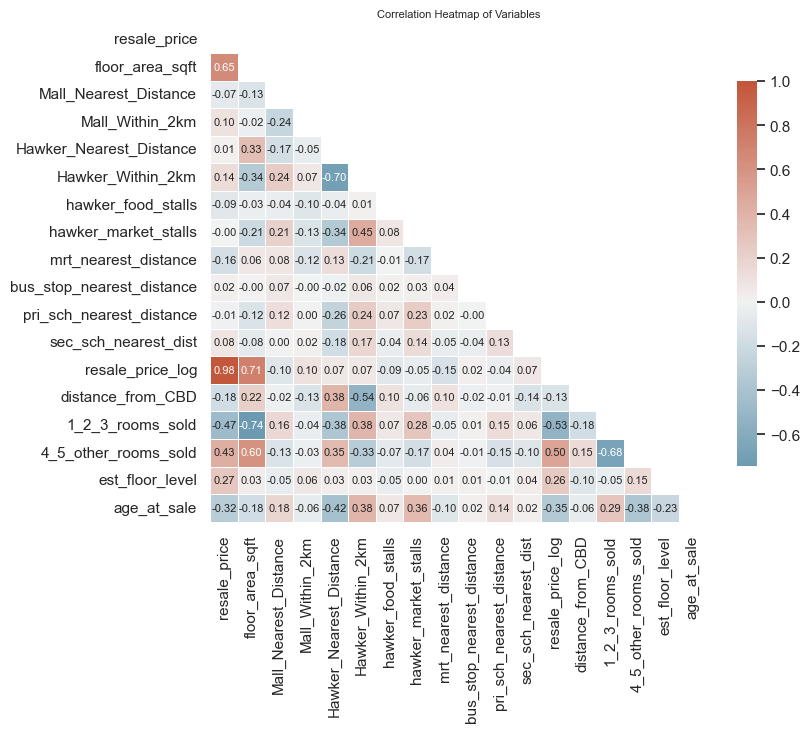

In [93]:
# Correlation of all numerical variables to observe the relationships between them 
# Check for multicollinearity between any 2 variables

sns.set_theme(style="white")
corr = housing.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, fmt = '.2f',
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size":8})
plt.title('Correlation Heatmap of Variables', fontsize=8)

In [94]:
# Based on the above correlation matrix, to drop the following variables since they have no relationship with resale price
# These variables are also regularly excluded in lasso regression

housing.drop(columns = ['Hawker_Nearest_Distance', 'hawker_market_stalls'], inplace = True)

In [95]:
housing.head()

id  flat_type  flat_model  resale_price Tranc_Year  floor_area_sqft  \
0   88471     4 ROOM     Model A      680000.0       2016         6.876017   
1  122598     5 ROOM    Improved      665000.0       2012         7.243742   
2  170897  EXECUTIVE   Apartment      838000.0       2013         7.346021   
3   86070     4 ROOM     Model A      550000.0       2012         7.010936   
4  153632     4 ROOM  Simplified      298000.0       2017         6.795048   

  commercial planning_area  Mall_Nearest_Distance  Mall_Within_2km  \
0          N       Kallang               6.997679         1.945910   
1          N        Bishan               6.764971         1.098612   
2          N   Bukit Batok               7.285904         1.386294   
3          Y        Bishan               6.856646         1.386294   
4          N        Yishun               6.592732         0.693147   

   Hawker_Within_2km  hawker_food_stalls  mrt_nearest_distance  \
0           2.564949            4.430817              5.799344   
1           1.945910            4.382027              6.806453   
2           0.000000            4.430817              7.196126   
3           2.197225            3.465736              6.810642   
4           0.000000            3.806662              6.021856   

   bus_stop_nearest_distance  pri_sch_nearest_distance  \
0                   3.381926                  7.037584   
1                   4.064019                  6.029741   
2                   5.369465                  6.212304   
3                   3.770379                  5.964904   
4                   4.863084                  5.994462   

                            pri_sch_name  sec_sch_nearest_dist  \
0               Geylang Methodist School              7.037584   
1  Kuo Chuan Presbyterian Primary School              6.104557   
2                  Keming Primary School              5.193371   
3                   Catholic High School              5.964904   
4              Naval Base Primary School              5.743085   

                              sec_sch_name  resale_price_log  \
0                 Geylang Methodist School         13.429848   
1  Kuo Chuan Presbyterian Secondary School         13.407542   
2             Yusof Ishak Secondary School         13.638773   
3                     Catholic High School         13.217674   
4             Orchid Park Secondary School         12.604849   

   distance_from_CBD  1_2_3_rooms_sold  4_5_other_rooms_sold  est_floor_level  \
0           1.261663               0.0              4.955827         2.397895   
1           0.851318               0.0              4.718499         2.079442   
2           2.227732               0.0              4.499810         2.639057   
3           0.799040               0.0              4.317488         1.098612   
4           1.328843               0.0              3.871201         0.693147   

   age_at_sale  
0     2.302585  
1     3.218876  
2     2.772589  
3     2.995732  
4     3.401197

In [96]:
# final dataset for modelling 

housing.shape

(150634, 24)

### Exporting data

In [97]:
# Save as csv file 
housing.to_csv('../datasets/housing3.csv')  